<div style="text-align:center">
<img src="img/intro_correspondre.png">
</div>


*** CREATION IN PROGRESS ***<br>
Notebook created by GITHUB ESTELLE DERRIEN

## Summary

27. <b> Modeling of a shortest path problem  </b>
    - Abstract
    - Instance : Basical case
    - NetworkX Djikstra Solution
    - SHortest Path Python Pulp Solution
    - Instance : Find shortest path from Chicago to Dallas
    - Naïve wrong try out example with python pulp
    - Hard coded Python Pulp solution
    - Mathematical model
    - Compact Python Pulp solution
28. <b> Modeling of a production allocation problem  </b>
    - Abstract
    - Instance : Mumbaï university - 3 products company
    - Math model
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)
29. <b> Simple machinery load balancing </b>
    - Abstract
    - Instance : Minimize the electricity cost of 4 machines ( Estelle Derrien example)
    - Math model
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)
    - Adding workers costs

30. <b> Modeling of an oil refinery problem</b>
    - Abstract
    - Instance : ApMonitor example
    - Math model
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)

31. <b> Modeling of a 1d cutting stock problem  </b>
    - Abstract
    - Difference between 1d and 2d
    - Instance : Andrew Crouter - Colorado school of mines
    - Math model - Gau and Wascher (1995).
    - Python Pulp solution (Hard coded)
    - First of all, let's confirm the provided solution works .
    - Python Pulp solution (Stuart Mitchell  Compact model)
    - Automatically computing all of the cutting stock patterns possibilities

32. <b> Modeling of a parallels machines jobs scheduling problem  </b>
    - Abstract
    - Difference between Indentical machines VS uniform machine scheduling
    - Instance
    - Math model
    - Cplex Philippe Labourie code
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)
33. <b> Modeling of a 2d bin packing problem  </b>
    - Abstract
    - Instance
    - Math model
    - Python Rectpack solution
    - Drawing the content of the bin
    - Google OR solution
    - Drawing the content of the bin
    - Modeling of a 2d bin packing using ChatGpt and Cplex
    - Drawing the content of the bin
    - Asking ChatGpt to write the math model

34. <b> Modeling of a 3d bin packing problem  </b>
    - Abstract
    - Instance
    - Math model
35. <b> Modeling of a 2d cutting stock problem  </b>
    - Abstract
    - Instance
    - Math model
36. <b> Modeling of a flow shop problem  </b>
    - Abstract
    - Instance
    - Math model
    - CPlex Solution
    - Github Eray Cakici Solution
37. <b> Modeling of a job shop problem  </b>
    - Abstract
    - Difference between flow shop and job shop
    - Instance
    - Math model
    - CPlex Min Kyung Lee code
    - Google OR solution 
    - Pyomo solution
    - Genetic algoritm : https://github.com/jpuigcerver/jsp-ga
38. <b> Modeling of a chemistry combinatorial optimization  </b>
    - Abstract 
    - Instance : Tim Mac Graw Book problem BOILER/TURBO-GENERATOR SYSTEM
    - Mathematical modeling
    - Python Pulp or Cplex solution
39. <b> Modeling a petroleum combinatorial optimization </b>
    - Abstract and Kirchhoff constraints
    - Mathematical modeling
    - Python Pulp or Cplex solution
40. <b> Modeling of a multiple objectives problem</b>
    - Abstract of https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/
    - Mathematical modeling
    - Python Pulp or Cplex solution
41. <b> Getting familiar with sensitivity analysis</b>
    - Displaying Reduced costs
    - Displaying The Shadow Price
    - Displaying Slacks variables
42. <b> Getting familiar with variables relaxations</b>
43. <b> Getting familiar with columns generation</b>

44. <b> Linearizations </b>
    - Linearization technics using the AIMMS modeling guide and Ling-Chieh Kung technics
    - Objective linearizations
    - Constraints linearizations
    - Examples using Python solvers


44. <b> Apendix </b> 
- Importing a data instance from an Excel file
- Importing a data instance from a Database

# <b>27.  Modeling a shortest path problem  </b>

<div style="text-align:center">
<img src="img/highway.webp" width="500"/>
</div>

## <b>27.1 Abstract </b>

The shortest path problem is the problem of finding a path between two vertices (or nodes) in a graph such that the sum of the weights of its constituent edges is minimized.

## <b>27.2 Instance : Basical case</b>

<div style="text-align:center">
<img src="img/sp.png" width="500"/>
</div>

<b> What is the shortest path from node A to node F ?</b><br><br>
Link : https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html

## <b>27.4 NetworkX Djikstra Solution </b>


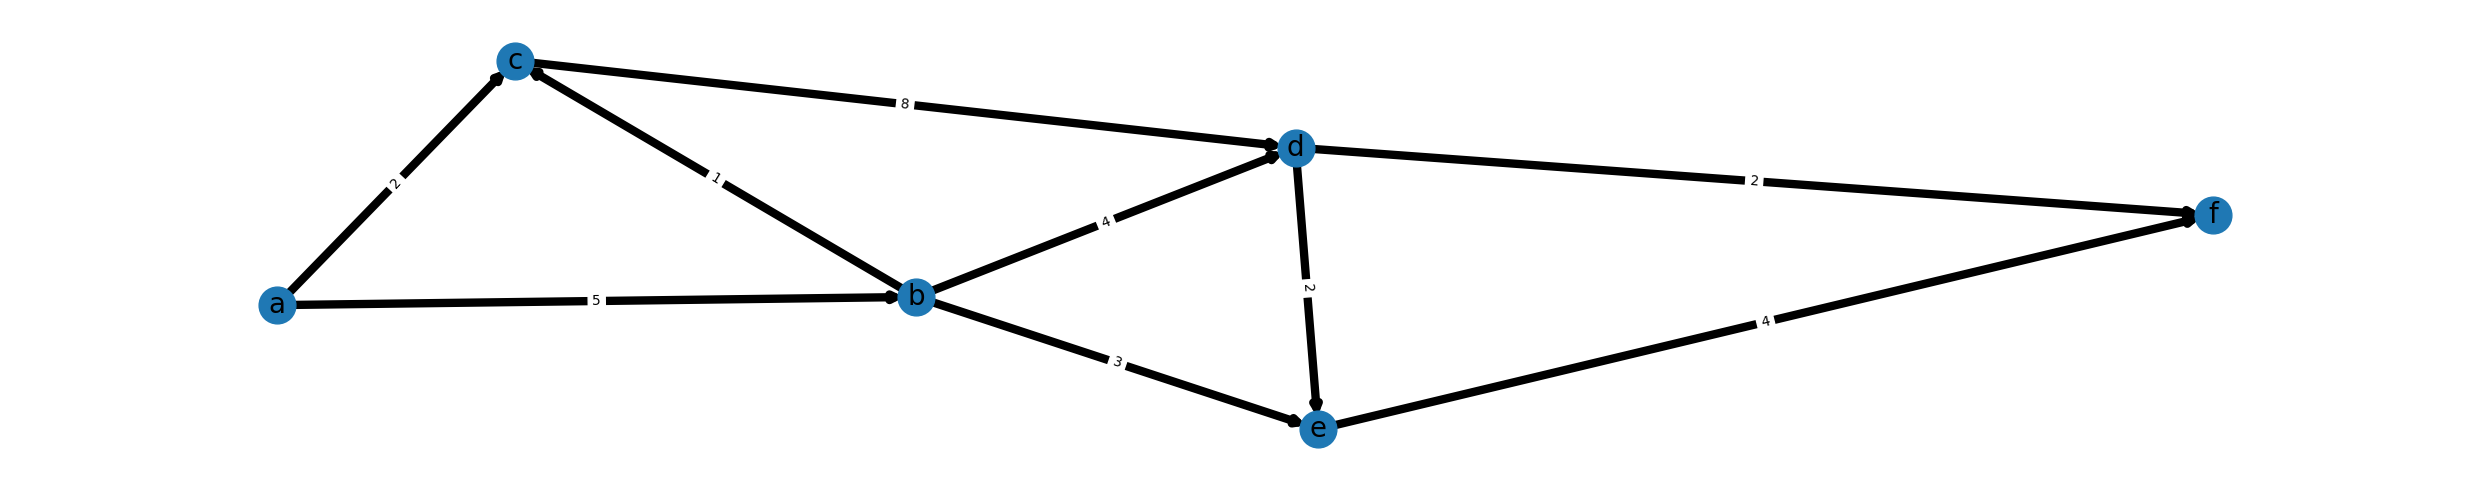

In [1058]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_edge("a", "b", weight=5,pos=(1,1))
G.add_edge("a", "c", weight=2)
G.add_edge("b", "c", weight=1,pos=(1,2))
G.add_edge("b", "d", weight=4)
G.add_edge("b", "e", weight=3)
G.add_edge("c", "d", weight=8)
G.add_edge("d", "e", weight=2)
G.add_edge("d", "f", weight=2)
G.add_edge("e", "f", weight=4)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=2)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [1059]:
print("Path to follow")
nx.dijkstra_path(G, "a", "f")

Path to follow


['a', 'b', 'd', 'f']

In [1060]:
print("Minimal Distance")
nx.dijkstra_path_length(G, "a", "f")

Minimal Distance


11

## <b>27.5 Python Pulp compact solution </b>

Testing the https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html LP code, this LP Pulp code provides the same solution than Djikstra :

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [1061]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------

N = ['A', 'B', 'C', 'D', 'E', 'F']

C = {'A': {'B': 5, 'C': 2}, 
     'B': {'C': 1, 'D': 4, 'E': 3}, 
     'C': {'D': 8}, 
     'D': {'E': 2, 'F': 2}, 
     'E': {'F': 4}}

# -----------------------------------
# All of the links from i to j possibilities
# -----------------------------------
# Meaning : node value is 1 if it's the first node, and -1 if F (last node)
D = {node: 1 if node == 'A' else -1 if node == 'F' else 0 for node in N}

# As soon as an xij variable is involved in the math model, 
# this coding strategy is used to model all of the possibilities.
# then, all of the possibilities becomes decisions variables, under the "decisions variables " part
E = [(i,j) for i in N for j in N if i in C.keys() if j in C[i].keys()]

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts('x', E,  lowBound = 0, upBound = 1, cat = LpInteger)

# -----------------------------------
# Math model 
# -----------------------------------

# objective
prob += lpSum([C[i][j]*x[i,j] for (i,j) in E])

# constraints
for i in N:
    prob += (lpSum([x[i,j] for j in N if (i,j) in E]) - lpSum([x[k,i] for k in N if (k,i) in E])) == D[i]

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)

print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
x_('A',_'B') = 1.0
x_('B',_'D') = 1.0
x_('D',_'F') = 1.0
Minimized path =  11.0


## <b> 27.6 Instance : Find shortest path from Chicago to Dallas</b>

Let's observe and recreate this hard coded version in Pulp , for a better understanding :

Link:
https://www.youtube.com/watch?v=7uCx--vUiiI

<div style="text-align:center">
<img src="img/sp2.png" >
</div>
Find the shortest path between Chicago and node 6 (Dallas), values are fictive.


<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's start with a naïve wrong try , picking all of the shortest nodes routes

In [1062]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *


# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Recreating all xij roads possibilities, it's supra boring by hand.
# simply look at the graph to recreate the decisions variables.

# Node 1
X12 = pulp.LpVariable('X12', lowBound=0, cat='Binary')
X13 = pulp.LpVariable('X13', lowBound=0, cat='Binary')
X14 = pulp.LpVariable('X14', lowBound=0, cat='Binary')

# Node 2
X23 = pulp.LpVariable('X23', lowBound=0, cat='Binary')
X25 = pulp.LpVariable('X25', lowBound=0, cat='Binary')

# Node 3
X32 = pulp.LpVariable('X32', lowBound=0, cat='Binary')
X34 = pulp.LpVariable('X34', lowBound=0, cat='Binary')
X35 = pulp.LpVariable('X35', lowBound=0, cat='Binary')
X36 = pulp.LpVariable('X36', lowBound=0, cat='Binary')

# Node 4
X43 = pulp.LpVariable('X43', lowBound=0, cat='Binary')
X47 = pulp.LpVariable('X47', lowBound=0, cat='Binary')

# Node 5
X52 = pulp.LpVariable('X52', lowBound=0, cat='Binary')
X53 = pulp.LpVariable('X53', lowBound=0, cat='Binary')
X56 = pulp.LpVariable('X56', lowBound=0, cat='Binary')
X57 = pulp.LpVariable('X57', lowBound=0, cat='Binary')

# Node 7
X74 = pulp.LpVariable('X74', lowBound=0, cat='Binary')
X75 = pulp.LpVariable('X75', lowBound=0, cat='Binary')
X76 = pulp.LpVariable('X76', lowBound=0, cat='Binary')

# -----------------------------------
# Math model 
# -----------------------------------

# Objective
# Find the shortest path = minimizing roads distances
prob += 35 * X12 + 30 * X13 + 20 * X14 + 20 * X23 + 12 * X25 + 8 * X32 + 9 * X34 + 10 * X35 + 20 * X36  + 9 * X43 + 15 * X47 + 12 * X52 + 10 * X53 + 5 * X56 + 20 * X57 + 15 * X74 + 20 * X75 + 5 * X76

# Constraints
# Only one road picked per node
prob += X12 + X13 + X14 == 1
prob += X23 + X25  == 1
prob += X32 + X34 + X35 + X36  == 1
prob += X43 + X47   == 1
prob += X52 + X53 + X56 + X57   == 1
prob += X74 + X75 + X76  == 1

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)



STATUS
Optimal

SOLUTION
X14 = 1.0
X25 = 1.0
X32 = 1.0
X43 = 1.0
X56 = 1.0
X76 = 1.0


Ok, in this front code, some logic is missing, we obtain each of the shortest node paths but it make no sense for finding the shortest path .
Let see how the constraints coding differs in this next coding part, path solution is correct  :

In [1063]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *


# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Recreating all xij roads possibilities, it's supra boring by hand.
# simply look at the graph to recreate the decisions variables.

# Node 1
X12 = pulp.LpVariable('X12', lowBound=0, cat='Binary')
X13 = pulp.LpVariable('X13', lowBound=0, cat='Binary')
X14 = pulp.LpVariable('X14', lowBound=0, cat='Binary')

# Node 2
X23 = pulp.LpVariable('X23', lowBound=0, cat='Binary')
X25 = pulp.LpVariable('X25', lowBound=0, cat='Binary')

# Node 3
X32 = pulp.LpVariable('X32', lowBound=0, cat='Binary')
X34 = pulp.LpVariable('X34', lowBound=0, cat='Binary')
X35 = pulp.LpVariable('X35', lowBound=0, cat='Binary')
X36 = pulp.LpVariable('X36', lowBound=0, cat='Binary')

# Node 4
X43 = pulp.LpVariable('X43', lowBound=0, cat='Binary')
X47 = pulp.LpVariable('X47', lowBound=0, cat='Binary')

# Node 5
X52 = pulp.LpVariable('X52', lowBound=0, cat='Binary')
X53 = pulp.LpVariable('X53', lowBound=0, cat='Binary')
X56 = pulp.LpVariable('X56', lowBound=0, cat='Binary')
X57 = pulp.LpVariable('X57', lowBound=0, cat='Binary')

# Node 7
X74 = pulp.LpVariable('X74', lowBound=0, cat='Binary')
X75 = pulp.LpVariable('X75', lowBound=0, cat='Binary')
X76 = pulp.LpVariable('X76', lowBound=0, cat='Binary')

# -----------------------------------
# Math model 
# -----------------------------------

# Objective
# Find the shortest path = minimizing roads distances
prob += 35 * X12 + 30 * X13 + 20 * X14 + 20 * X23 + 12 * X25 + 8 * X32 + 9 * X34 + 10 * X35 + 20 * X36  + 9 * X43 + 15 * X47 + 12 * X52 + 10 * X53 + 5 * X56 + 20 * X57 + 15 * X74 + 20 * X75 + 5 * X76

# Constraints
# Only one road picked per node
prob += X12 + X13 + X14 == 1 # Node 1 Chicago 

prob += X23 + X25  == X12 + X32 + X52
prob += X32 + X34 + X35 + X36  == X13 + X23 + X43 + X53
prob += X43 + X47   == X14 + X34 + X74 
prob += X52 + X53 + X56 + X57  == X25 + X35 + X75 
prob += X74 + X75 + X76  == X47 + X57

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')

for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)
print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
X14 = 1.0
X47 = 1.0
X76 = 1.0
Minimized path =  40.0


We see that the python pulp path [{1-4},{4-7},{7-6}] and the path value is <b>40</b> ,it's the same than the online business analytics youtube channel,looking good, bro.


<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
<div style="text-align:center">
<img src="img/spath2.png" width="500"/>
</div>

But I did not answer about " How theses strange constraints do works " ?
To answer that, we need to <b>link</b> the Shortest path LP <b>Math model</b> to the python pulp code, so, variables need to be stricly the same.

After that, we'll be able to RECODE this python pulp code as a <b>COMPACT MODEL</b>, just like in chapter 27.5, and make them perfectly match together.

## <b>Shortest Path LP Math model</b>

Let's first observe some maths models found on the internet : 

Bernard Lidicky Version :
https://lidicky.name/oldteaching/18.566/l13%20-%20Shortest%20Path%20and%20Linear%20Programming.pdf

<div style="text-align:center">
<img src="img/spmathmodel.png" width="500"/>
</div>

courses.ie.bilkent.edu.tr version :
https://courses.ie.bilkent.edu.tr/ie400/wp-content/uploads/sites/8/2017/09/Lecture8.pdf

<div style="text-align:center">
<img src="img/spmathmodel2.png" width="500"/>
</div>

The bilkent.edu model clearly looks like the code I've found in my chapter 27.5.
Let's match them variables names exactly, now, and keep the values found at chapter 27.6, will the solution be the same ? :

Instance reminder : Find the shortest path between node 1 (Chicago) and node 6 (Dallas).
<div style="text-align:center">
<img src="img/sp2.png" >
</div>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Now, I'm rewriting the Python pulp code just like the bilkent math model:

In [1064]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------

# Node list
A = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6','X7']

# Roads costs or length
C = {'X1': {'X2': 35, 'X3': 30 , 'X4': 20 }, 
     'X2': {'X3': 12, 'X5': 8},
     'X3': {'X2': 8,'X4': 9,'X5': 10,'X6': 20,}, 
     'X4': {'X3': 9, 'X7': 15 }, 
     'X5': {'X2': 12, 'X3': 10, 'X6': 5, 'X7': 20},
     'X6': {'X3': 20, 'X5': 5,'X7': 5},
     'X7': {'X5': 20, 'X6': 5}     
     }

# -----------------------------------
# Decision variables settings
# -----------------------------------
# Define starting and ending nodes like in the math model:
# Meaning : node value is 1 if it's the first node, and -1 if  last node
D = {node: 1 if node == 'X1' else -1 if node == 'X6' else 0 for node in A}

# -----------------------------------
# All of the links from i to j possibilities
# -----------------------------------
# As soon as an xij variable is involved in the math model, 
# this coding strategy is used to model all of the possibilities.
# then, all of the possibilities becomes decisions variables, under the "decisions variables " part
E = [(i,j) for i in A for j in A if i in C.keys() if j in C[i].keys()]
# The previous line recreates all of the decisions variables possibilities
# It was so boring to type by hand in the previous example : x_('X1',_'X4')

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables creation
# -----------------------------------
x = LpVariable.dicts('x', E,  lowBound = 0, upBound = 1, cat = LpInteger)

# -----------------------------------
# Math model 
# -----------------------------------

# objective
prob += lpSum([C[i][j]*x[i,j] for (i,j) in E]) # Looks like the math model

# constraints
for i in A:
    prob += (lpSum([x[i,j] for j in A if (i,j) in E]) - lpSum([x[j,i] for j in A if (j,i) in E])) == D[i] # Looks like the math model

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)

print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
x_('X1',_'X4') = 1.0
x_('X4',_'X7') = 1.0
x_('X7',_'X6') = 1.0
Minimized path =  40.0


We see that the python pulp path [{1-4},{4-7},{7-6}] and the path value is <b>40</b>, that's the same than the online business analytics youtube channel, done with Lindo, looking good, bro, and now, we can make the link between the math model, and the python pulp code with ease, cool , bro.


<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

# <b> 28.  Modeling of a production allocation problem  </b>

<div style="text-align:center">
<img src="img/free-photo-of-industrial-factory-floor-with-machinery.jpeg" width="500"/>
</div>
    
## <b>28.1 Abstract</b>

We distribute our products to be built on machines which produce an identical product
under different time constraints per machine. They can be labelled as "parallels machines".

## <b>28.2 Instance : Mumbaï university - 3 products company</b>
<div style="text-align:center">
<img src="img/productionallocation.jpg"  />
</div>

## <b>28.3 Math model</b>
To formulate the math model, I look closely at the exposed problem, deducing the objective fonction, and constraints,
and including the mandatory nomenclature.

$$
Max (P) = \sum_{j=1}^{3} p_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
   \sum_{j=1}^{3} t_{ij}.x_{j}  <= a_{i}  \thinspace ∀ \thinspace i \in (1,...,3)
$$
$$
x_{j} \in ℕ 
$$

$$
where
$$

$$
 P = main \thinspace profit
$$
$$
 x_{j} = product \thinspace 
$$
$$
 p_{j} = product \thinspace profit
$$
$$
 t_{ij} = time \thinspace per \thinspace product \thinspace   j \thinspace per \thinspace machine \thinspace i
$$
$$
 a_{i} = available \thinspace time \thinspace per \thinspace machine \thinspace i
$$
$$
 X = Products \thinspace set
$$
$$
 m = Machines \thinspace set
$$



## <b>28.4 Python Pulp hard coded solution</b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [1065]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p 
  
# -----------------------------------
# Type of problem
# -----------------------------------
Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
  
# -----------------------------------
# decision variables creation
# -----------------------------------
# Products aren't separables, so they are integer variables.
x = p.LpVariable("x", lowBound = 0, cat='Integer')   
y = p.LpVariable("y", lowBound = 0, cat='Integer')   
z = p.LpVariable("z", lowBound = 0, cat='Integer')   

# -----------------------------------
# Math model
# -----------------------------------
# Objective
Lp_prob +=  4 * x + 3 * y + 6 * z
  
# Constraints
# Machine 1
Lp_prob += 2 * x + 3 * y + 2 * z <= 440
# Machine 2
Lp_prob += 4 * x + 0 * y + 3 * z <= 470
# Machine 3
Lp_prob += 2 * x + 5 * y + 0 * z <= 430

# Facultative : Minimal amount of produced goods
# Lp_prob += x  >= 100
# Lp_prob += y  >= 10
# Lp_prob += z  >= 10
  
# -----------------------------------
# Solution
# -----------------------------------

status = Lp_prob.solve()

# Lp status
print(p.LpStatus[status])   
  
# Display solution
print( p.value(x)," amount of product 1 to build ")
print(p.value(y) , "amount of product 2 to build "  )
print(p.value(z) , "amount of product 3 to build "  )
print(p.value(Lp_prob.objective) ,"Profit in euros " )


Optimal
0.0  amount of product 1 to build 
42.0 amount of product 2 to build 
156.0 amount of product 3 to build 
1062.0 Profit in euros 


I do notice that this math model does not dispatch products per machines, well, it's normal, It's another case, and another math model, I think I have it somewhere...

# <b> 28.5 Python Pulp solution (Compact model)</b>

Now, I am using the math model to express the compact Python Pulp code, variables names are the same than in the math model , I am now avoiding arrays, and using nested 'objects' to recreate the math model , hu:

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [1066]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp

# -----------------------------------
# Instance
# -----------------------------------
# Products variables
X = ['P1', 'P2', 'P3']

m = ['M1','M2','M3']

# Products profits
p = {'P1': 4, 'P2': 3, 'P3': 6}

# Products time making per machines
t = {'M1': {'P1': 2, 'P2': 3 , 'P3': 2 }, 
     'M2':{'P1': 4, 'P2': 0 , 'P3': 3 }, 
     'M3':{'P1': 2, 'P2': 5 , 'P3': 0 }
}

# Available time per machine
a = {'M1': 440,
     'M2':470,
     'M3':430
}

# -----------------------------------
# Type of problem
# -----------------------------------
Lp_prob = LpProblem('Problem', LpMaximize)  
  
# -----------------------------------
# decision variables creation
# -----------------------------------
# Products aren't separables, so they are integer variables.
x = LpVariable . dicts ( "product" , X , lowBound = 0 , cat = 'Integer' ) 

# -----------------------------------
# Math model
# -----------------------------------
# Objective
Lp_prob += lpSum ([ p [ j ] * x [ j ] for j in X ]), "MAXIMIZE_PROFIT_FUNCTION_P" # Looks like the math model
# Note : don't be scared, the previous line simply recreates equivalent to 4 * x + 3 * y + 6 * z as in the previous example
  
# Constraints
for i in m: 
    Lp_prob += lpSum ([ t [ i ][ j ] * x [ j ] for j in X ]) <= a[i]  # Looks like the math model, ain't that cool, bro ?

# Note : don't be scared, the previous line simply recreates constraints equivalent to the previous hard coded example
# # Machine 1
# Lp_prob += 2 * x + 3 * y + 2 * z <= 440
# # Machine 2
# Lp_prob += 4 * x + 0 * y + 3 * z <= 470
# # Machine 3
# Lp_prob += 2 * x + 5 * y + 0 * z <= 430

  
# -----------------------------------
# Solution
# -----------------------------------
Lp_prob.solve ()

print('Status:', LpStatus[Lp_prob.status])

for v in Lp_prob . variables ():
    print( v . name , "=" , v . varValue )

print ( "Maximized total profit = " , value ( Lp_prob.objective ) )


Status: Optimal
product_P1 = 0.0
product_P2 = 42.0
product_P3 = 156.0
Maximized total profit =  1062.0


# <b> 30. Simple machinery load balancing </b>

<div style="text-align:center">
<img src="img/Fotothek_df_ps_0000315_Montagehalle_einer_Maschinenfabrik.jpg" width="500"/>
</div>


## <b> Abstract </b>

I have an inventory of items to be processed by parallel machines which have different production costs.
How can I distribute my objects in order to minimize my production costs?

## <b> Instance </b>
I have 200 items in inventory to process, and 4 machines from differents size with a respective electricity cost of 2 dollars , 4 dollars, 5 dollars and 2 dollars.
My machines production capacities are 50,100,100,50 units a day.
How can I minimize my electricity cost ?

 <table style="margin: 0px auto;">
  <tr>
    <th><b>Machine</b></th>
    <th>Machine1</th>
    <th>Machine2</th>
    <th>Machine3</th>
    <th>Machine4</th>
  </tr>
  <tr>
    <td>Capacity (Units)</td>
    <td>50</td>
    <td>100 </td>
    <td>100 </td>
    <td>50</td>
  </tr>
  <tr>
    <td>Electricity cost/day (Dollars)</td>
    <td>2</td>
    <td>4 </td>
    <td>5 </td>
    <td>2</td>
  </tr>
 
   
</table> 

## <b> Math model </b>
$$
Min (C) = \sum_{j=1}^{4} cost_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
   \sum_{j=1}^{4} x_{j}  = inventory  
$$
$$
    x_{j}  <= capacity_{j}  
$$
$$
x_{j} \in ℕ 
$$

$$
where
$$

$$
 C = main \thinspace cost
$$
$$
 x_{j} = number \thinspace  of \thinspace  items \thinspace  to \thinspace  assign \thinspace to \thinspace  the \thinspace  j \thinspace  machine 
$$
$$
 cost_{j} = cost \thinspace per \thinspace  j \thinspace  machine
$$
$$
 capacity_{j} = capacity \thinspace per \thinspace  j \thinspace  machine
$$
$$
 inventory = inventory \thinspace to \thinspace process
$$

$$
 X = machines \thinspace set
$$


## <b> Python pulp solution (hard coded ) </b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [1067]:
from pulp import *
 
# -----------------------------------
# Decisions variables
# -----------------------------------
machine1 = LpVariable('machine1', lowBound=0, cat='Integer') 
machine2 = LpVariable('machine2', lowBound=0, cat='Integer')
machine3 = LpVariable('machine3', lowBound=0, cat='Integer')
machine4 = LpVariable('machine4', lowBound=0, cat='Integer')

 
# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('load_balancing_optimisation',LpMinimize) # I wish to minimize the electricity consumption !
 
# -----------------------------------
# Math model
# -----------------------------------
# Objective : Minimize cost of electricity 
Problem += 2*machine1 + 4*machine2 + 5*machine3 + 2*machine4 
 
# Constraints

# Inventory to process
Problem += machine1 + machine2 + machine3 + machine4   == 200

# Machines capacity
Problem += machine1   <= 50
Problem += machine2   <= 100
Problem += machine3   <= 100
Problem += machine4   <= 50

# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()

print('Statut:', LpStatus[Problem.status])
print('Minimized electricity production cost = ', value(Problem.objective),'dollars')
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked machinery:',i.name, '=', i.varValue, "units")

Statut: Optimal
Minimized electricity production cost =  600.0 dollars
Picked machinery: machine1 = 50.0 units
Picked machinery: machine2 = 100.0 units
Picked machinery: machine4 = 50.0 units


## <b> Python pulp solution (Compact model) </b>

Here is a code striclty corresponding to my math model . (Franckly speaking , I think I should add an Aij type of indice somewhere, maybe, but it already work as this.)

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [1068]:
from pulp import *
 
# -----------------------------------
# Instance
# -----------------------------------
# Machines set
X = ['M1','M2','M3','M4']

# Electricity cost per machine
costs = {   'M1':2,
            'M2':4,
            'M3':5,
            'M4':2
        }

# Capacity per machine
capacities = {  'M1':50,
                'M2':100,
                'M3':100,
                'M4':50
            }

# Inventory of items to process
inventory = 200

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('load_balancing_optimization',LpMinimize) # I wish to minimize the electricity consumption !
 
# -----------------------------------
# Decision variables creation
# -----------------------------------
# Items per machines aren't separables, so they are integer variables.
x = LpVariable . dicts ( "machinery" , X , lowBound = 0 , cat = 'Integer' ) 

# -----------------------------------
# Math model
# -----------------------------------
# Objective : Minimize cost of electricity 
Problem += lpSum ([ costs [ j ] * x [ j ] for j in X ]), "MINIMIZE_COST_FUNCTION_C" # Looks like the math model
 
# Constraints

# Inventory to process
Problem += lpSum ([ x [ j ] for j in X ]) == 200 # Looks like the math model

# Machines capacity
for j in capacities:
    Problem +=  x [ j ]  <= capacities[j] # Looks like the math model


# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()

print('Statut:', LpStatus[Problem.status])
print('Minimized electricity production cost = ', value(Problem.objective),'dollars')
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked machinery:',i.name, '=', i.varValue, "units")

Statut: Optimal
Minimized electricity production cost =  600.0 dollars
Picked machinery: machinery_M1 = 50.0 units
Picked machinery: machinery_M2 = 100.0 units
Picked machinery: machinery_M4 = 50.0 units



## Adding the workers costs

Saying now that the machines requires a different type of workers, with various costs, will the result be the same ?
The biggers machines are simplier to handle, to the worker cost is cheaper. At contrario, the older smaller machines requiers 
highly specialized kind of workers, really high payed.

## Updated instance
 <table style="margin: 0px auto;">
  <tr>
    <th><b>Machine</b></th>
    <th>Machine1</th>
    <th>Machine2</th>
    <th>Machine3</th>
    <th>Machine4</th>
  </tr>
  <tr>
    <td>Capacity</td>
    <td>50</td>
    <td>100 </td>
    <td>100 </td>
    <td>50</td>
  </tr>
  <tr>
    <td>Electricity cost/day (Dollars)</td>
    <td>2</td>
    <td>4 </td>
    <td>5 </td>
    <td>2</td>
  </tr>
    <tr>
    <td>Worker cost/day (Dollars)</td>
    <td>300</td>
    <td>100 </td>
    <td>100 </td>
    <td>300</td>
  </tr>
 
   
</table> 

## Updated solution

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [1069]:
from pulp import *
 
# -----------------------------------
# Instance
# -----------------------------------
# Machines set
X = ['M1','M2','M3','M4']

# Electricity cost per machine
costs = {   'M1':2,
            'M2':4,
            'M3':5,
            'M4':2
        }

# Capacity per machine
capacities = {  'M1':50,
                'M2':100,
                'M3':100,
                'M4':50
            }

worker_cost = {  'M1':300,
                'M2':100,
                'M3':100,
                'M4':300
            }

# Inventory of items to process
inventory = 200

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('load_balancing_optimization',LpMinimize) # I wish to minimize the main cost !
 
# -----------------------------------
# Decision variables creation
# -----------------------------------
# Items per machines aren't separables, so they are integer variables.
x = LpVariable . dicts ( "machinery" , X , lowBound = 0 , cat = 'Integer' ) 

# -----------------------------------
# Math model
# -----------------------------------
# Objective : Minimize cost of electricity and the workers cost AT THE SAME TIME
Problem += lpSum ([ costs [ j ] * x [ j ] for j in X ] + [ worker_cost [ j ] * x [ j ] for j in X ]), "MINIMIZE_COST_FUNCTION_C" # Looks like the math model
 
# Constraints

# Inventory to process
Problem += lpSum ([ x [ j ] for j in X ]) == 200 # Looks like the math model

# Machines capacity
for j in capacities:
    Problem +=  x [ j ]  <= capacities[j] # Looks like the math model


# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()

print('Statut:', LpStatus[Problem.status])
print('Minimized whole production cost = ', value(Problem.objective),'dollars')
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked machinery:',i.name, '=', i.varValue, "units")

Statut: Optimal
Minimized whole production cost =  20900.0 dollars
Picked machinery: machinery_M2 = 100.0 units
Picked machinery: machinery_M3 = 100.0 units


We see that now, Pulp is picking the 2 biggers machines, solution is absolutly not the same than the initial problem, but it's good, and logical.

 # <b> 29.  Modeling of an oil refinery problem</b>


<div style="text-align:center">
<img src="img/oil-refinery-purpose-crude-oil-products.jpg" width="500">
</div>

 ## Abstract

I am the manager of a refinery, I need to define which barrels to produce, to maximize my profit, under some constraints.
 
## Instance : ApMonitor example

Source : https://www.youtube.com/watch?v=Ht1atCXPp24
AP Monitor : Oil Refinery Optimization

- I have two suppliers who sell crude oil for 24 dollars and 15 dollars respectively.
- My refinery resells gasoline for 36 dollars, kerosene for 24 dollars, fuel for 21 dollars and residue for 10 dollars.

How can I maximize my profit(income), subject to max allowable production ?


The transformation characteristics are expressed in the following table:
<div style="text-align:center">
<img src="img/raffinerie.png">
</div>
We see that CRUDE oil 1 makes it possible to produce much more gasoline, for example.
On the other hand, CRUDE oil 2 allows more fuel to be produced, this is expressed in percentages.
We also see the maximum production expressed in BBL in the right column and the production cost per BBL, an SI UNIT of the United States which means Barrel of crude: "The abbreviation BBL stands for a barrel of crude oil."

This is my company commercial plan :
 <table style="margin: 0px auto;">
  <tr>
    <th><b>Product</b></th>
    <th>Gazoline</th>
    <th>Kerosene</th>
    <th>Fuel Oil</th>
    <th>Residual</th>

  </tr>
  <tr>
    <td>Income in dollars</td>
    <td>36</td>
    <td>24</td>
    <td>21</td>
    <td>10</td>
 
  </tr>
 
 
   
</table> 

And the costs :
 <table style="margin: 0px auto;">
  <tr>
    <th><b>Crude Oil</b></th>
    <th>1</th>
    <th>2</th>


  </tr>
  <tr>
    <td>Processing cost ($/BBL)</td>
    <td>0.50</td>
    <td>1</td>

 
  </tr>
   <tr>
    <td>Raw material ($/BBL)</td>
    <td>24</td>
    <td>15</td>
  </tr>
 
 
   
</table> 



## Math model (Hard coded): 
<div style="text-align:center">
<img src="img/raffinerie2.png">
</div>

And if we want to simplify the objective function, we subtract the production and purchasing costs in advance in the objective function: 

<div style="text-align:center">
<img src="img/raffinerie3.png">
</div>






## Math model (Compact model) 

I will elaborate the compact math model, looking closely at the instance, then testing it using python pulp.



$$
Max (P) =  ( income_{k} * (\sum_{j=1}^{2} percentage_{ij}.x_{j})  \thinspace  ∀ \thinspace k \in (1,...,4))
-   \sum_{j=1}^{2} processingCost_{j}.x_{j} - \sum_{j=1}^{2} rawCost_{j}.x_{j} 
$$ 
$$
subject \thinspace to
$$

$$
   \sum_{i=1}^{2} \frac{percentage_{ij}}{100} .x_{i} <= maxProd_{j} \thinspace  ∀ \thinspace j \in (1,...,3)
$$

$$
x_{j} \in ℕ 
$$

$$
where
$$

$$
 P = main \thinspace profit
$$
$$
 x_{j} = Number \thinspace of \thinspace BBl \thinspace per \thinspace day \thinspace to \thinspace produce
$$

$$
 income_{k} = Income \thinspace per \thinspace type \thinspace of \thinspace product \thinspace k
$$
$$
percentage_{ij} = percentage \thinspace of \thinspace product \thinspace j \thinspace per \thinspace crude \thinspace i
$$

$$
processingCost_{j} = processing \thinspace cost \thinspace of \thinspace bbl \thinspace j
$$
$$
rawCost_{j} = raw \thinspace cost \thinspace cost \thinspace of \thinspace bbl \thinspace j
$$
$$
maxProd_{i} = max \thinspace production \thinspace of \thinspace product \thinspace i \thinspace (per \thinspace line \thinspace i)
$$

## Python Pulp solution (Hard coded)

With Python Pulp, we see that we obtain the same result as in the AP Monitor video, which however uses another solver...

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [1070]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('oil_refinery_problem', LpMaximize)  

# -----------------------------------
# Decision variables
# -----------------------------------
X1 = LpVariable("Crud1", 0, None, LpInteger)   
X2= LpVariable("Crud2", 0, None, LpInteger)   


# -----------------------------------
# Math model
# -----------------------------------
# Objective
prob +=  8.1 * X1 + 10.2 * X2

# Constraints: 

# Max prod expressed in number of barils

# Gazoil
prob += 0.80 * X1 + 0.44 * X2  <= 24000
# Kerosene
prob += 0.05 * X1 + 0.10 * X2  <= 2000
# Fuel
prob += 0.10 * X1 + 0.36 * X2  <= 6000

# -----------------------------------
# Solution
# -----------------------------------
prob.solve()

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Maximized profit = ", value(prob.objective),"dollars")

Crud1 = 26206.0
Crud2 = 6897.0
Maximized profit =  282618.0 dollars


## Python Pulp solution (Compact model)

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's redo the previous hard coded code, but accordingly to the math model I've done.<br>
Solution must be exactly the same, It's just rewritten with more flexibility, 
but at the end, if you print the pulp model, that is EXACTLY THE SAME THING than the hard coded one.
<br>
This is an important point to understand.<br>

<br>
- <b>percentage ij</b> is a matrix in the math model, let's see how to handle that in the pulp code, using "nested objects" ( dictionnary ).</br><br>
- <b>computedIncome</b> is used to simplify the code, because there are several pre-computations in the APMonitor example, my math model describes more of the computation</br>

In [1071]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('oil_refinery_problem', LpMaximize)  

# -----------------------------------
# Instance
# -----------------------------------

## BBLs characteristics
X = ['X1','X2']  # BBL/DAY
processingCost  = {'X1':0.50,'X2':1}
rawCost         = {'X1':24,'X2':15}
percentage      = { 'X1': {'GAZOLINE': 80, 'KEROSENE':5 , 'FUEL':10}, 
                    'X2': {'GAZOLINE': 44, 'KEROSENE': 10, 'FUEL':36}
                }
computedIncome   =  {'X1':32.6,'X2':26.8}

## Products characteristics
product         = ['GAZOLINE','KEROSENE','FUEL']  ## Products to do
income          = {'GAZOLINE':36,'KEROSENE':24,'FUEL':21}
maxProd         = {'GAZOLINE':24000,'KEROSENE':2000,'FUEL':6000}

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('oil_refinery_problem', LpMaximize)  

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('x', X,  lowBound = 0, cat = LpInteger)

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += lpSum ([ computedIncome [ j ] * x [ j ] for j in X ]) - lpSum ([ processingCost [ j ] * x [ j ] for j in X ]) - lpSum ([ rawCost [ j ] * x [ j ] for j in X ]), "MAXIMIZE_FUNCTION_P" 

# Constraints 
for j in product: # Strictly like the math model
    prob += lpSum ([ (percentage [ i ][ j ] / 100) * x [ i ] for i in X ]) <= maxProd[j] # Strictly like the math model

# -----------------------------------
# Solution
# -----------------------------------
prob.solve()

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Maximized profit = ", value(prob.objective),"dollars")


x_X1 = 26206.0
x_X2 = 6897.0
Maximized profit =  286756.20000000007 dollars


I see that my compact python pulp code now provides the same solution thant the Ap Monitor video, good looking, bro !
I am now not only dealing with some hard code, boring to handle,  but with a generic model, that will evolve through the hard times, and why not adding some non linear stuffs, later , that's what we'll soon see, in my other documentations.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

# <b> 31.  Modeling of a 1d cutting stock problem  </b>

<div style="text-align:center">
<img src="img/precise-scissors-cutting-icon-crafting-260nw-2492458287.webp" width="500"/>
</div>

## Abstract

The cutting stock problem consists of cutting elements (Wood, Metal, etc.) in the most judicious way, in order to reduce losses.
This problem being complicated, we are obliged to define cutting patterns beforehand, the solver will then decide
which cutting patterns to select, in order to save as much stock as possible.

Best links : 
- https://repository.mines.edu/server/api/core/bitstreams/8072a052-f286-4690-868f-426c3b295568/content
- https://towardsdatascience.com/linear-programming-the-stock-cutting-problem-dc6ba3bf3de1/

## Instance

Let's take this Andrew Crouter example, from Colorado school of mines, just to verify that we get the same solution like him, I do not recopy the whole 
thing.

<b>Customer Order :</b>

 <table style="margin: 0px auto;">
  <tr>
    <td>Number of needed pieces</td>
    <td>Length of each pieces</td>
  </tr>
  <tr>
    <td>10</td>
    <td>4</td>

  </tr>
  <tr>
    <td>12</td>
 <td>5</td>
  </tr>
   <tr>
    <td>6</td>
     <td>10</td>

  </tr>
</table> 

<b>Stock length : </b>

 <table style="margin: 0px auto;">
  <tr>
    <td>Stock length</td>

  </tr>
  <tr>
    <td>15</td>
  </tr>

</table> 

<b>Some patterns possibilities:</b>


<div style="text-align:center">
<img src="img/patterns.png" width="500">
</div>


<b>All of the patterns possibilities:</b>

Please look at the Andrew L Crouter document to find it. There are several technics to calculate all of the patterns possibilities, then, you inject it
inside of the linear program. This one has been done by hand, by Andrew L Crouter.
<div style="text-align:center">
<img src="img/Screenshot 2025-10-25 at 12-29-01 Crouter_10794203.pdf.png" width="500"/>
</div>

## <b>Math model</b>

Here is the integer formulation Gau and Wascher (1995). Let's make it match to the Python Pulp code later : 

$$
Min (T) = \sum_{i=1}^{n} x_{j} 
$$
$$
subject \thinspace to
$$
$$
   \sum_{i=1}^{n} a_{ij}.x_{j}   = d_{i}
$$
$$
x_{j} \in ℕ 
$$

$$
where
$$

$$
 T = Total \thinspace number \thinspace of \thinspace stock \thinspace lengths \thinspace used \thinspace = \thinspace minimize \thinspace patterns \thinspace use
$$
$$
 x_{j} =  Number \thinspace of \thinspace times \thinspace to \thinspace perform \thinspace cutting \thinspace pattern \thinspace j
$$
$$
 d_{i} =  Demand \thinspace of \thinspace i \thinspace length
$$
$$
n = total \thinspace number \thinspace of \thinspace cutting \thinspace patterns \thinspace that \thinspace can \thinspace be \thinspace cut \thinspace from \thinspace L
$$
$$
a_{ij} = pattern \thinspace setting \thinspace ( \thinspace That's \thinspace a \thinspace matrix \thinspace)
$$
$$
L = unit \thinspace stock \thinspace length
$$


## <b>Python Pulp solution ( hard coded )</b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's first use logic, to type the hard coded version of the cutting stock prob :

In [1072]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp

# -----------------------------------
# Type of problem
# -----------------------------------
lp_problem = pulp.LpProblem("stock_cutting", pulp.LpMinimize) # Minimize number of used patterns

# -----------------------------------
# Decision variables
# -----------------------------------
# Each decision variable is a pattern 
x1 = pulp.LpVariable('x1', lowBound=0, cat = LpInteger)
x2 = pulp.LpVariable('x2', lowBound=0, cat = LpInteger)
x3 = pulp.LpVariable('x3', lowBound=0, cat = LpInteger)
x4 = pulp.LpVariable('x4', lowBound=0, cat = LpInteger)
x5 = pulp.LpVariable('x5', lowBound=0, cat = LpInteger)
x6 = pulp.LpVariable('x6', lowBound=0, cat = LpInteger)
x7 = pulp.LpVariable('x7', lowBound=0, cat = LpInteger)
x8 = pulp.LpVariable('x8', lowBound=0, cat = LpInteger)
x9 = pulp.LpVariable('x9', lowBound=0, cat = LpInteger)
x10 = pulp.LpVariable('x10', lowBound=0, cat = LpInteger)
x11 = pulp.LpVariable('x11', lowBound=0, cat = LpInteger)
x12 = pulp.LpVariable('x12', lowBound=0, cat = LpInteger)

# -----------------------------------
# math model
# -----------------------------------

# Objective
lp_problem += x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 # Minimize number of used patterns

# Constraints
lp_problem += 3 * x1 + 2 * x3 + x4 + 2 * x5 + x6 + x8 + x10 == 10, "order_of_4_length_pieces" # meaning that 4 length piece is present 3 times in pattern x1 , and so on ...
lp_problem += 3 * x2 + 1 * x3 + 2 * x4 + x6 + 2 * x7 + x9 + x11 == 12, "order_of_5_length_pieces"
lp_problem += x8 + x9 + x12 == 6, "order_of_10_length_pieces" # meaning that 10 length piece is present 1 time in pattern x8 ,x9 and x12 !

# -----------------------------------
# solution
# -----------------------------------
# Solve the problem
lp_problem.solve()
# Output the results
print("Status:", pulp.LpStatus[lp_problem.status])

print("Optimal number of stock purchases:", pulp.value(lp_problem.objective))

print("Optimal use of cut patterns:")
print("x1 =", pulp.value(x1))
print("x2 =", pulp.value(x2))
print("x3 =", pulp.value(x3))
print("x4 =", pulp.value(x4))
print("x5 =", pulp.value(x5))
print("x6 =", pulp.value(x6))
print("x7 =", pulp.value(x7))
print("x8 =", pulp.value(x8))
print("x9 =", pulp.value(x9))
print("x10 =", pulp.value(x10))
print("x11 =", pulp.value(x11))
print("x12 =", pulp.value(x12))

# print ( lp_problem )



Status: Optimal
Optimal number of stock purchases: 12.0
Optimal use of cut patterns:
x1 = 3.0
x2 = 2.0
x3 = 0.0
x4 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 6.0
x10 = 1.0
x11 = 0.0
x12 = 0.0


## First of all, let's confirm the provided solution works .

- <b>Customer wanted 6 pieces of 10 in length :</b><br>
Previous Solution tells us to cut the x9 pattern 6 times, because it holds 1 piece of 10 in length</b><br>
Let's do the math : <br>
6 * x9 pattern = 6 * 10 length = 6 pieces for the customer.<br>
Total = 6 pieces<br>
<span style="color:red"> The customer demand of 6 pieces of 10 in length is satisfied</span>


- <b>Customer wanted 10 pieces of 4 in length :</b><br>
Previous Solution tells us to cut the x1 pattern 3 times, because it holds 3 pieces of 4 in length</b><br>
Previous Solution tells us to cut the x10 pattern 1 time, because it holds 1 piece of 4 in length</b><br>
Let's do the math : <br>
3 * x1 pattern = 3 * 3 pieces of 4 in length = 9 pieces for the customer.<br>
1 * x10 pattern = 1 * 1 pieces of 4 in length = 1 pieces for the customer.<br>
TOTAL = 10 pieces<br>
<span style="color:red"> The customer demand of 10 pieces of 4 in length is satisfied</span>

- <b>Customer wanted 12 pieces of 5 in length :</b><br>
Previous Solution tells us to cut the x2 pattern 2 times, because it holds 3 pieces of 5 in length</b><br>
Previous Solution tells us to cut the x9 pattern 6 times, because it holds 1 piece of 5 in length</b><br>
Let's do the math : <br>
2 * x2 pattern = 2 * 3 pieces of 5 in length = 6 pieces for the customer.<br>
6 * x9 pattern = 6 * 1 pieces of 5 in length = 6 pieces for the customer.<br>
TOTAL = 12 pieces<br>
<span style="color:red"> The customer demand of 12 pieces of 5 in length is satisfied</span>

VERY COOL ! Solution works and It's nice , good looking, bro! The provided minimized amount of patterns is the same than the Andrew L Crouter from Colorado school of mines documentation !

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

## <b>Python Pulp solution ( Compact model )</b>

Let's modifiy the Stuart Mitchell code, accordingly, I notice there is a cost per roll added, inside of the original problem.

Solution is identical like the hard coded one, but, using this form of code, we'll later be able to inject data easily, and... the Math model has to be stricly the same, including naming conventions, we'll do it a few after .

In [1073]:
"""
The Simplified Sponge Roll Problem for the PuLP Modeller
Authors: Antony Phillips, Dr Stuart Mitchell   2007
"""

# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
# A list of all roll lengths that the consumer can order
LenOpts = ["4", "5", "10"]

# A dictionary of demand for each length desired by consumers
rollDemand = {"4": 10, "5": 12, "10": 6}

# A list of all models is created
PatternNames = ["x1", "x2", "x3","x4","x5","x6","x7","x8","x9","x10","x11","x12"]

# When you cut a roll, there are several possible solutions, we call this a pattern.
patterns =   [[3, 0, 2, 1, 2,1,0,1,0,1,0,0],    # 4
              [0, 3, 1, 2, 0,1,2,0,1,0,1,0],    # 5
              [0, 0, 0, 0, 0,0,0,1,1,0,0,1]]    # 10
              #x1 x2 x3 ...

# Cost of each roll
# cost = 1

# -----------------------------------
# Decision variables pre treatment
# -----------------------------------

# Les données de modèle sont transformées en un dictionnaire
patterns = makeDict([LenOpts, PatternNames], patterns, 0)


# -----------------------------------
# decisions variables
# -----------------------------------

vars = LpVariable.dicts("Patt", PatternNames, 0, None, LpInteger)

# -----------------------------------
# Type of problem
# -----------------------------------

prob = LpProblem("Cutting_Stock_Problem", LpMinimize)

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += lpSum([vars[i]  for i in PatternNames]), "minimize_use_of_patterns"
# prob += lpSum([vars[i] * cost for i in PatternNames]), "Production Cost" # Original problem

# Demand constraint
for i in LenOpts:
    prob += (
        lpSum([vars[j] * patterns[i][j] for j in PatternNames]) == rollDemand[i],"Ensuring enough %s cm rolls" % i,)
    
# -----------------------------------
# Solution
# -----------------------------------

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# The optimised objective function value is printed to the screen
print("Optimal number of stock purchases = ", value(prob.objective))

# Each of the variables is printed with it's resolved optimum value
print("Optimal use of cut patterns:")
for v in prob.variables():
    if(v.varValue >= 1):
        print(v.name, "=", v.varValue)

# print ( prob )

Status: Optimal
Optimal number of stock purchases =  12.0
Optimal use of cut patterns:
Patt_x1 = 3.0
Patt_x10 = 1.0
Patt_x2 = 2.0
Patt_x9 = 6.0


## Automatically computing all of the cutting stock patterns possibilities

And now, let's try to create all of the patterns possibilities , using python , because we simply can't do it by hand all of the time:

- With Itertools
- Using a greedy algo

After, that, I'll be able to create a program that will do everything in one go.

!! Please wait, doing it !! 


In this first try, 0 is missing :

In [1074]:

from itertools import product
x= 1
for item in product(['4', '5', '10'], repeat=3):
    z = int(item[0])+int(item[1])+int(item[2])
    if(z<=15):
        print (item)
        x += 1
print(x)

# test 2
from itertools import combinations
numbers = (4, 5, 10)
for count in range(1, 3):
    for t in combinations(numbers, count):
        print(t, sum(t))

# test 3
from itertools import permutations
res = list(permutations([4, 5, 10]))
print(res)



('4', '4', '4')
('4', '4', '5')
('4', '5', '4')
('4', '5', '5')
('5', '4', '4')
('5', '4', '5')
('5', '5', '4')
('5', '5', '5')
9
(4,) 4
(5,) 5
(10,) 10
(4, 5) 9
(4, 10) 14
(5, 10) 15
[(4, 5, 10), (4, 10, 5), (5, 4, 10), (5, 10, 4), (10, 4, 5), (10, 5, 4)]


In [1075]:
from itertools import permutations

perm = permutations((4, 5, 10), 3)
for i in list(perm):
    print(i)

(4, 5, 10)
(4, 10, 5)
(5, 4, 10)
(5, 10, 4)
(10, 4, 5)
(10, 5, 4)


# <b>32.  Modeling of a parallels machines jobs scheduling problem  </b>

<div style="text-align:center">
<img src="img/FactoryFloor_HL_Plastics_Plant.jpg" width="500">
</div>


## <b>Abstract</b>

I have a factory with several identical machines, which go at the same speed. 
I have several jobs to process which have different durations, with or without precedence constraints.

How to minimize total factory run time (the makespan is minimized)?

Best link : https://en.wikipedia.org/wiki/Optimal_job_scheduling

Curiosity : https://github.com/epogrebnyak/linprog/blob/main/task1.py

## <b> Difference between Indentical machines VS uniform machine scheduling</b>

Identical-machines scheduling = There are m parallel machines, and they are identical. <br>
Uniform-machines scheduling = There are m parallel machines, and they have different given speeds.<br>


## <b>Instance</b>
 <table style="margin: 0px auto;">
  <tr>
    <td>Job</td>
    <td>A</td>
    <td>B</td>
    <td>C</td>
    <td>D</td>
    <td>E</td>
    <td>F</td>
    <td>G</td>
  </tr>
  <tr>
    <td>Release</td>
    <td>2</td>
    <td>5</td>
    <td>4</td>
    <td>0</td>
    <td>0</td>
    <td>8</td>
    <td>9</td>

  </tr>
  <tr>
    <td>Duration</td>
    <td>5</td>
    <td>6</td>
    <td>8</td>
    <td>4</td>
    <td>2</td>
    <td>3</td>
    <td>2</td>

  </tr>
    <tr>
    <td>Due date</td>
    <td>10</td>
    <td>21</td>
    <td>15</td>
    <td>10</td>
    <td>5</td>
    <td>15</td>
    <td>22</td>

  </tr>
</table> 

 <table style="margin: 0px auto;">

  <tr>
    <td>Number of identical machines</td>
    <td>2</td>
  </tr>

</table> 
 

## <b>Math model</b>
Comin' soon

## <b>Cplex-Docplex code solution</b>

Philippe Laborie code ( I have added the jobs names):

Minimize scheduled makespan = 15

No due dates.

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 7 variables, 1 constraint
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 19.7 (before), 19.7 (after)
 !  . Memory usage      : 514.1 kB (before), 514.1 kB (after)
 ! Using parallel search with 8 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0          7                 -
 + New bound is 8
 *            16       15  0.05s        1      (gap is 50.00%)
 *            15       63  0.05s        1      (gap is 46.67%)
              15     1000          1    1         6 != startOf(_ITV_2)
              15     2000          1    1   F     4  = startOf(_ITV_4)
              15     2070          1    1   F         !presenceOf(_ITV_3)
 + New bound is 15 (gap is 0.00%)
 ! --------------------------------------------

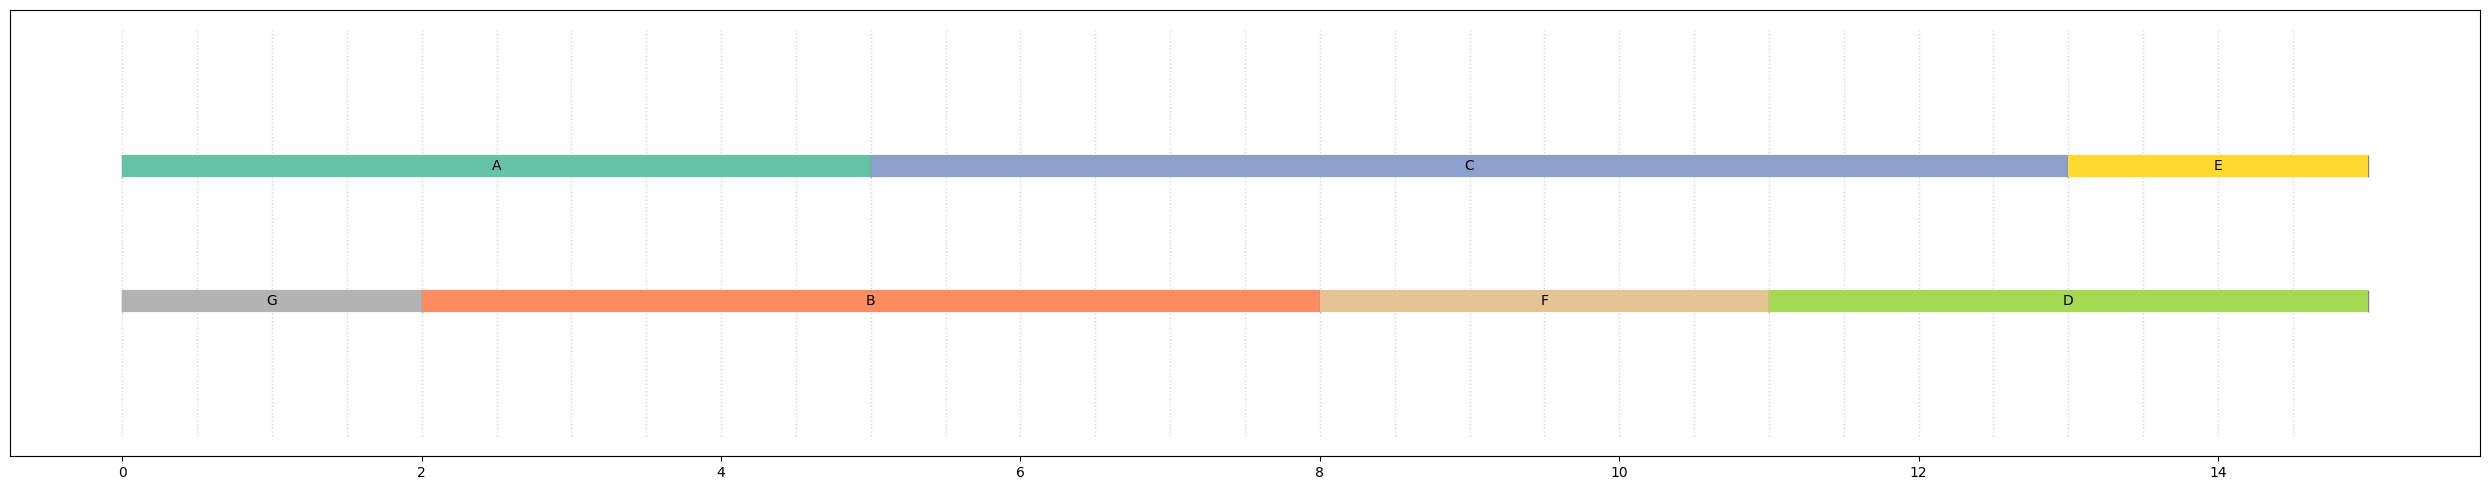

In [1076]:
# https://stackoverflow.com/questions/65229519/scheduling-tasks-on-2-parallel-machines
# You could use CP techniques and a CP Solver. Here is an example using CP-Optimizer in Python:

# 1. PROBLEM DATA (EXAMPLE)
JOBS     = ['A','B','C','D','E','F','G',]
n        = 7
DURATION = [ 5, 6, 8, 4, 2, 3, 2 ]
# DAG      = [ [0,5], [1,6], [2,4], [3,7], [3,8], [4,10], [5,9], [6,11], [7,13], [8,12],[9,14], [10,15], [12,16], [14,17], [15,18], [16,19] ]
N        = range(n)

# 2. MODELING THE PROBLEM WITH CP-OPTIMIZER
from docplex.cp.model import *
m = CpoModel()
task = [interval_var(size=DURATION[i]) for i in N ]         # Decision     variables: tasks
usedMachines = sum([pulse(task[i],1) for i in N])           # Cumul function: number of tasks executing over time
m.add(minimize(max(end_of(task[i]) for i in N)))            # Objective: minimize schedule makespan
# m.add([end_before_start(task[i],task[j]) for [i,j] in DAG]) # Constraints: precedence between tasks
m.add(usedMachines <= 2)                                    # Constraints: maximal number of machines

# 3. SOLVING THE PROBLEM
sol = m.solve()

# 4. DISPLAY SOLUTION
# print(m.write_information(out=None))
# print(m.get_objective())

import docplex.cp.utils_visu as visu
for i in range(n):
    visu.interval(sol.get_var_solution(task[i]), i, JOBS[i])
visu.show()


## <b>Pyomo solution</b>

https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/04.02-Machine-Bottleneck.html

Chapter 4.2.5

Minimize scheduled makespan = 15

Presence of due dates.

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -15.0
  Upper bound: -15.0
  Number of objectives: 1
  Number of constraints: 98
  Number of variables: 50
  Number of nonzeros: 15
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.8
  Wallclock time: 0.8
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 52
      Number of created su

{'Makespan': 15.0,
 'Max Pastdue': 0,
 'Sum of Pastdue': 0,
 'Number Pastdue': 0,
 'Number on Time': 7,
 'Fraction on Time': 1.0}

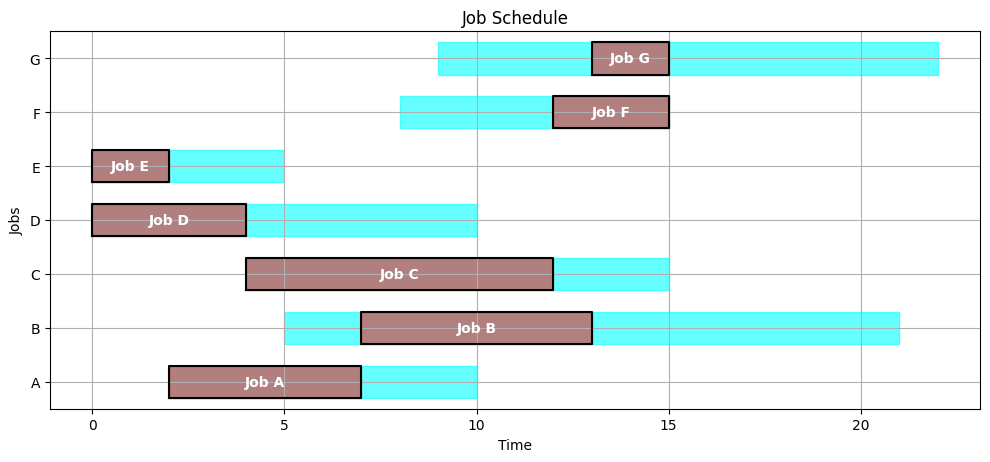

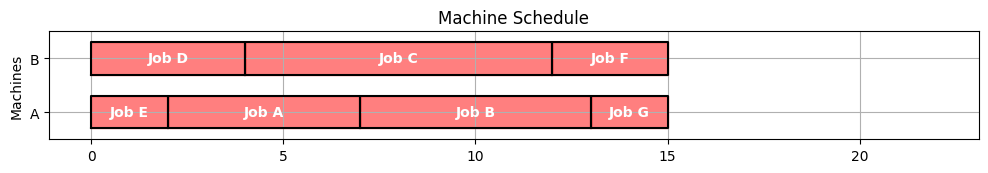

In [1077]:
# -----------------------------------
# Import
# -----------------------------------
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import shutil
import sys
import os.path
from pyomo.environ import *
from pyomo.gdp import *


MACHINES = ['A','B']

# -----------------------------------
# Instance
# -----------------------------------
JOBS = {
    'A': {'release': 2, 'duration': 5, 'due': 10},
    'B': {'release': 5, 'duration': 6, 'due': 21},
    'C': {'release': 4, 'duration': 8, 'due': 15},
    'D': {'release': 0, 'duration': 4, 'due': 10},
    'E': {'release': 0, 'duration': 2, 'due':  5},
    'F': {'release': 8, 'duration': 3, 'due': 15},
    'G': {'release': 9, 'duration': 2, 'due': 22},
}

def schedule_machines(JOBS, MACHINES):
    
    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.J = Set(initialize=JOBS.keys())
    m.M = Set(initialize=MACHINES)
    m.PAIRS = Set(initialize = m.J * m.J, dimen=2, filter=lambda m, j, k : j < k)

    # decision variables
    m.start      = Var(m.J, bounds=(0, 1000))
    m.makespan   = Var(domain=NonNegativeReals)
    m.pastdue    = Var(m.J, domain=NonNegativeReals)
    m.early      = Var(m.J, domain=NonNegativeReals)
    
    # additional decision variables for use in the objecive
    m.ispastdue  = Var(m.J, domain=Binary)
    m.maxpastdue = Var(domain=NonNegativeReals)
    
    # for binary assignment of jobs to machines
    m.z = Var(m.J, m.M, domain=Binary)

    # for modeling disjunctive constraints
    m.y = Var(m.PAIRS, domain=Binary)
    BigM = max([JOBS[j]['release'] for j in m.J]) + sum([JOBS[j]['duration'] for j in m.J])

    m.OBJ = Objective(expr = sum(m.pastdue[j] for j in m.J) + m.makespan - sum(m.early[j] for j in m.J), sense = minimize)

    m.c1 = Constraint(m.J, rule=lambda m, j: 
            m.start[j] >= JOBS[j]['release'])
    m.c2 = Constraint(m.J, rule=lambda m, j:
            m.start[j] + JOBS[j]['duration'] + m.early[j] == JOBS[j]['due'] + m.pastdue[j])
    m.c3 = Constraint(m.J, rule=lambda m, j: 
            sum(m.z[j,mach] for mach in m.M) == 1)
    m.c4 = Constraint(m.J, rule=lambda m, j: 
            m.pastdue[j] <= BigM*m.ispastdue[j])
    m.c5 = Constraint(m.J, rule=lambda m, j: 
            m.pastdue[j] <= m.maxpastdue)
    m.c6 = Constraint(m.J, rule=lambda m, j: 
            m.start[j] + JOBS[j]['duration'] <= m.makespan)
    m.d1 = Constraint(m.M, m.PAIRS, rule = lambda m, mach, j, k:
            m.start[j] + JOBS[j]['duration'] <= m.start[k] + BigM*(m.y[j,k] + (1-m.z[j,mach]) + (1-m.z[k,mach])))
    m.d2 = Constraint(m.M, m.PAIRS, rule = lambda m, mach, j, k: 
            m.start[k] + JOBS[k]['duration'] <= m.start[j] + BigM*((1-m.y[j,k]) + (1-m.z[j,mach]) + (1-m.z[k,mach])))
    
    SolverFactory('cbc').solve(m).write()
    
    SCHEDULE = {}
    for j in m.J:
        SCHEDULE[j] = {
            'start': m.start[j](), 
            'finish': m.start[j]() + JOBS[j]['duration'],
            'machine': [mach for mach in MACHINES if m.z[j,mach]()][0]
        }
        
    return SCHEDULE
        
SCHEDULE = schedule_machines(JOBS,MACHINES)

# -----------------------------------
# Tracing gantt
# -----------------------------------
def gantt(JOBS, SCHEDULE={}):
    bw = 0.3
    plt.figure(figsize=(12, 0.7*(len(JOBS.keys()))))
    idx = 0
    for j in sorted(JOBS.keys()):
        x = JOBS[j]['release']
        y = JOBS[j]['due']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='cyan', alpha=0.6)
        if j in SCHEDULE.keys():
            x = SCHEDULE[j]['start']
            y = SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start'] + SCHEDULE[j]['finish'])/2.0,idx,
                'Job ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        idx += 1

    plt.ylim(-0.5, idx-0.5)
    plt.title('Job Schedule')
    plt.xlabel('Time')
    plt.ylabel('Jobs')
    plt.yticks(range(len(JOBS)), JOBS.keys())
    plt.grid()
    xlim = plt.xlim()
    
    if SCHEDULE:
        for j in SCHEDULE.keys():
            if 'machine' not in SCHEDULE[j].keys():
                SCHEDULE[j]['machine'] = 1
        MACHINES = sorted(set([SCHEDULE[j]['machine'] for j in SCHEDULE.keys()]))

        plt.figure(figsize=(12, 0.7*len(MACHINES)))
        for j in sorted(SCHEDULE.keys()):
            idx = MACHINES.index(SCHEDULE[j]['machine'])
            x = SCHEDULE[j]['start']
            y = SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start'] + SCHEDULE[j]['finish'])/2.0,idx,
                'Job ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        plt.xlim(xlim)
        plt.ylim(-0.5, len(MACHINES)-0.5)
        plt.title('Machine Schedule')
        plt.yticks(range(len(MACHINES)), MACHINES)
        plt.ylabel('Machines')
        plt.grid()

# -----------------------------------
# Display KPIs
# -----------------------------------
def kpi(JOBS, SCHEDULE):
    KPI = {}
    KPI['Makespan'] = max(SCHEDULE[job]['finish'] for job in SCHEDULE)
    KPI['Max Pastdue'] = max(max(0, SCHEDULE[job]['finish'] - JOBS[job]['due']) for job in SCHEDULE)
    KPI['Sum of Pastdue'] = sum(max(0, SCHEDULE[job]['finish'] - JOBS[job]['due']) for job in SCHEDULE)
    KPI['Number Pastdue'] = sum(SCHEDULE[job]['finish'] > JOBS[job]['due'] for job in SCHEDULE)
    KPI['Number on Time'] = sum(SCHEDULE[job]['finish'] <= JOBS[job]['due'] for job in SCHEDULE)
    KPI['Fraction on Time'] = KPI['Number on Time']/len(SCHEDULE)
    return KPI


gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

# <b>33. Modeling of a 2d bin packing problem  </b>

<div style="text-align:center">
<img src="img/D-regular-packing-problem.png" width="500">
</div>


## <b>Abstract</b>
The goal is to fit as many rectangles, having different lengths and widths, into a bin.
There can be several bins.
The objective is to allocate all the items to the minimum number of bins.

https://github.com/solomon-b/greedypacker
## <b>Instance</b>
 <table style="margin: 0px auto;">
  <tr>
    <td>Rectangle</td>
    <td>A</td>
    <td>B</td>
    <td>C</td>
    <td>D</td>
    <td>E</td>
    <td>F</td>
  </tr>
  <tr>
    <td>Width</td>
    <td>100</td>
    <td>40</td>
    <td>30</td>
    <td>70</td>
    <td>100</td>
    <td>30</td>
</tr>
<tr>
    <td>Length</td>
    <td>30</td>
    <td>60</td>
    <td>30</td>
    <td>70</td>
    <td>50</td>
    <td>30</td>
</tr>
</table> 

<br>

 <table style="margin: 0px auto;">
  <tr>
    <td>Bins</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Width</td>
    <td>300</td>
    <td>80</td>
    <td>200</td>

</tr>
<tr>
    <td>Length</td>
    <td>450</td>
    <td>40</td>
    <td>150</td>

</tr>
</table> 


## <b>Math model</b>

https://amsdottorato.unibo.it/id/eprint/6810/1/PhD_Pietrobuoni.pdf has a great 1d and 2d models description.

## <b>Rectpack code solution</b>

In this Rectpack solution, I see that only one bin is used, Rectpack provides the rectangles x and y positions inside of the bin .

In [1078]:
# -----------------------------------
# Import
# -----------------------------------
from rectpack import newPacker

# -----------------------------------
# Instance
# -----------------------------------
rectangles = [(100, 30), (40, 60), (30, 30),(70, 70), (100, 50), (30, 30)]
bins = [(300, 450), (80, 40), (200, 150)]


# -----------------------------------
# Params
# -----------------------------------
packer = newPacker()

# Add the rectangles to packing queue
for r in rectangles:
	packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
	packer.add_bin(*b)

# Start packing
packer.pack()

# -----------------------------------
# Solution
# -----------------------------------

# Obtain number of bins used for packing
nbins = len(packer)
print("Number of bins used for packing = ",nbins)

# Index first bin
abin = packer[0]

# Bin dimensions (bins can be reordered during packing)
width, height = abin.width, abin.height
print("Bin dimensions  = ",width, height)

# Number of rectangles packed into first bin
nrect = len(packer[0])
print("Number of rectangles packed into first bin = ",nrect)
print(" ---------------------------------------------------")

# Pick First bin first rectangle
rect = packer[0][0]

# rect is a Rectangle object
x = rect.x # rectangle bottom-left x coordinate
y = rect.y # rectangle bottom-left y coordinate
w = rect.width
h = rect.height

print(" first added rectangle bottom-left x coordinate = ", x)
print(" first added rectangle bottom-left y coordinate = ", y)
print(" first added rectangle width = ", w)
print(" first added rectangle height = ", h)
print(" ---------------------------------------------------")
# Pick First bin second rectangle
rect = packer[0][2]

# rect is a Rectangle object
x = rect.x # rectangle bottom-left x coordinate
y = rect.y # rectangle bottom-left y coordinate
w = rect.width
h = rect.height

print(" second added rectangle bottom-left x coordinate = ", x)
print(" second added rectangle bottom-left y coordinate = ", y)
print(" second added rectangle width = ", w)
print(" second added rectangle height = ", h)

# Looping over all of the rectangles positions
print(" ---------------------------------------------------")
print("Looping over all of the rectangles")
print("Printing rectangles width and height, and position inside of the bin")
print(" x,y,w,h")
for abin in packer:
  print(abin.bid) # Bin id if it has one
  for rect in abin:
    print(rect)

Number of bins used for packing =  1
Bin dimensions  =  300 450
Number of rectangles packed into first bin =  6
 ---------------------------------------------------
 first added rectangle bottom-left x coordinate =  0
 first added rectangle bottom-left y coordinate =  0
 first added rectangle width =  100
 first added rectangle height =  50
 ---------------------------------------------------
 second added rectangle bottom-left x coordinate =  0
 second added rectangle bottom-left y coordinate =  50
 second added rectangle width =  100
 second added rectangle height =  30
 ---------------------------------------------------
Looping over all of the rectangles
Printing rectangles width and height, and position inside of the bin
 x,y,w,h
None
R(0, 0, 100, 50)
R(100, 0, 70, 70)
R(0, 50, 100, 30)
R(170, 0, 60, 40)
R(230, 0, 30, 30)
R(260, 0, 30, 30)


## Drawing the content of the bin

As Rectpack provided the rectangles positions, we can draw them inside of the bin, using matplotlib for a better understanding of the optimization caracteristics.
If you look at the 2 smallers rectangles (30 * 30), you'll see that their x position is correct in the drawing.

Thanks to https://www.gorillasun.de/blog/rectangle-packing-an-incredibly-difficult-problem/

bin 300 450 nr of rectangles in bin 6
rectangle 100 50
rectangle 70 70
rectangle 100 30
rectangle 60 40
rectangle 30 30
rectangle 30 30


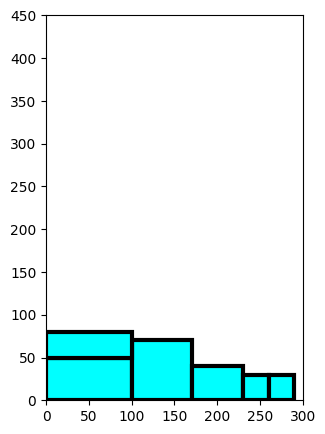

In [1079]:
import matplotlib.pyplot as plt
from matplotlib import patches

output = []
for index, abin in enumerate(packer):
    bw, bh  = abin.width, abin.height
    print('bin', bw, bh, "nr of rectangles in bin", len(abin))
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
for rect in abin:
    x, y, w, h = rect.x, rect.y, rect.width, rect.height
    output.append([x,y,w,h])
    plt.axis([0,bw,0,bh])
    print('rectangle', w,h)
    ax.add_patch(
        patches.Rectangle(
            (x, y),  # (x,y)
            w,          # width
            h,          # height
            facecolor="#00ffff",
            edgecolor="black",
            linewidth=3
        )
    )
    # fig.savefig("rect_%(index)s.png" % locals(), dpi=144, bbox_inches='tight')
# printing the rectangle coordinates to plot them in P5JS

## Google OR solution

<div style="text-align:center">
<img src="img/googleor.jpg" width="500">
</div>

Let's now compare the Rectpack solution, to the Google OR tools solution :


return code:4
status:OPTIMAL
Bin number =  0
Rectangle values width =  100 height=  30
Rectangle position x= 0 y= 0
Bin number =  0
Rectangle values width =  40 height=  60
Rectangle position x= 0 y= 30
Bin number =  0
Rectangle values width =  30 height=  30
Rectangle position x= 0 y= 90
Bin number =  0
Rectangle values width =  30 height=  30
Rectangle position x= 0 y= 120
Bin number =  0
Rectangle values width =  70 height=  70
Rectangle position x= 0 y= 150
Bin number =  0
Rectangle values width =  100 height=  50
Rectangle position x= 0 y= 220
CPU times: total: 0 ns
Wall time: 35.7 ms


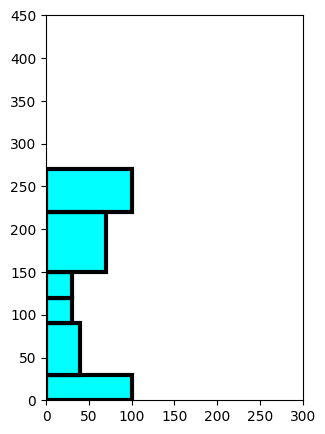

In [1080]:
%%time
from ortools.sat.python import cp_model
import pandas

#---------------------------------------------------
# data 
#---------------------------------------------------

data = {'bin':{'h':450,'w':300},
        'cat1':{'w': 100,'h':30,'items':1},
        'cat2':{'w': 40,'h': 60,'items':1},
        'cat3':{'w': 30,'h':30,'items':2},
        'cat4':{'w':70,'h': 70,'items':1},
        'cat5':{'w': 100,'h': 50,'items': 1}}      

#
# extract data for easier access
#

# bin width and height
H = data['bin']['h']
W = data['bin']['w']

# h,w,cat for each item
h = [data[cat]['h'] for cat in data if cat!='bin' for i in range(data[cat]['items'])]
w = [data[cat]['w'] for cat in data if cat!='bin' for i in range(data[cat]['items'])]
cat = [cat for cat in data if cat!='bin' for i in range(data[cat]['items'])]
n = len(h)  # number of items
m = 10  # max number of bins

#---------------------------------------------------
# or-tools model 
#---------------------------------------------------

model = cp_model.CpModel()

#
# variables
#

# x and y
x = [model.NewIntVar(0,W-w[i],f'x{i}') for i in range(n)]

xb1 = [model.NewIntVar(0,m*W-w[i],f'xb1.{i}') for i in range(n)]
xb2 = [model.NewIntVar(w[i],m*W,f'xb2.{i}') for i in range(n)]

y1 = [model.NewIntVar(0,H-h[i],f'y1.{i}') for i in range(n)]
y2 = [model.NewIntVar(h[i],H,f'y2.{i}') for i in range(n)]

# interval variables
xival = [model.NewIntervalVar(xb1[i],w[i],xb2[i],f'xival{i}') for i in range(n)]
yival = [model.NewIntervalVar(y1[i],h[i],y2[i],f'yival{i}') for i in range(n)]

# bin numbers
b = [model.NewIntVar(0,m-1,f'b{i}') for i in range(n)]

# objective
z = model.NewIntVar(0,m-1,'z')

#
# constraints
#
for i in range(n):
  model.Add(xb1[i] == x[i] + b[i]*W)
  model.Add(xb2[i] == xb1[i] + w[i])

model.AddNoOverlap2D(xival,yival)

model.AddMaxEquality(z,[b[i] for i in range(n)])

# objective
model.Minimize(z)    

#
# solve model
#
solver = cp_model.CpSolver()
# log does not work inside a Jupyter notebook
# solver.parameters.log_search_progress = True
rc = solver.Solve(model)
print(f"return code:{rc}")
print(f"status:{solver.StatusName()}")

# -----------------------------------
# Display solution
# ----------------------------------- 

for i in range(n):
  print("Bin number = ",solver.Value(b[i]))
  print("Rectangle values width = ",w[i],"height= ",h[i])
  print("Rectangle position x=",solver.Value(x[i]),"y=",solver.Value(y1[i]))

# -----------------------------------
# Drawing content of the bin
# -----------------------------------


import matplotlib.pyplot as plt
from matplotlib import patches

output = []
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

rectangle_list = {}
for i in range(n):
  rectangle_list[i] = {'x':solver.Value(x[i]),'y':solver.Value(y1[i]),'w':w[i],'h':h[i]}

for k in rectangle_list:
    plt.axis([0,W,0,H])
    ax.add_patch(
        patches.Rectangle(
            (rectangle_list[k]["x"], rectangle_list[k]["y"]),  # (x,y)
            rectangle_list[k]["w"],          # width
            rectangle_list[k]["h"],          # height
            facecolor="#00ffff",
            edgecolor="black",
            linewidth=3
        )
    )

# <b>Modeling of a 2d bin packing using ChatGpt and Cplex</b>


<div style="text-align:center">
<img src="img/chatgpt.png" width="200"/>
</div>

<div style="text-align:center">
<img src="img/IBM_CPLEX_0.png">
</div>

I am now testing some ChatGpt and Gemini and Claude AI, let's make sure the provided solution is ok .

Here is a complete example of 2D bin packing solved with CPLEX, in Python with DOcplex (MIP).
The model places rectangles in non-overlapping rectangular bins, minimizing the number of bins used.

Model assumptions

- Each object is a rectangle (width, height)

- All bins are the same size

- No rotation (I can add it if you want)

- Classic MIP formulation with Big-M constraints

In [1081]:
from docplex.mp.model import Model

# -------------------------
# Données
# -------------------------
items = {
    0: (2, 3), # width,height
    1: (3, 2),
    2: (4, 3),
    3: (1, 5)
}

bin_width = 6
bin_height = 6
num_bins = len(items)  # borne max

# -------------------------
# Modèle
# -------------------------
mdl = Model("2D_Bin_Packing")

# Variables
x = mdl.binary_var_dict(((i, b) for i in items for b in range(num_bins)), name="x")
y = mdl.binary_var_dict(range(num_bins), name="y")

X = mdl.continuous_var_dict(((i, b) for i in items for b in range(num_bins)), lb=0, name="X")
Y = mdl.continuous_var_dict(((i, b) for i in items for b in range(num_bins)), lb=0, name="Y")

# Variables de non-chevauchement
left  = mdl.binary_var_dict(((i, j, b) for i in items for j in items for b in range(num_bins) if i < j), name="left")
right = mdl.binary_var_dict(((i, j, b) for i in items for j in items for b in range(num_bins) if i < j), name="right")
above = mdl.binary_var_dict(((i, j, b) for i in items for j in items for b in range(num_bins) if i < j), name="above")
below = mdl.binary_var_dict(((i, j, b) for i in items for j in items for b in range(num_bins) if i < j), name="below")

M = 1000

# -------------------------
# Contraintes
# -------------------------

# Chaque objet dans un seul bac
for i in items:
    mdl.add_constraint(mdl.sum(x[i, b] for b in range(num_bins)) == 1)

# Lien objet-bac
for i in items:
    for b in range(num_bins):
        mdl.add_constraint(x[i, b] <= y[b])

# Objets dans les limites du bac
for i, (w, h) in items.items():
    for b in range(num_bins):
        mdl.add_constraint(X[i, b] + w <= bin_width + M * (1 - x[i, b]))
        mdl.add_constraint(Y[i, b] + h <= bin_height + M * (1 - x[i, b]))

# Non-chevauchement
for i in items:
    for j in items:
        if i < j:
            wi, hi = items[i]
            wj, hj = items[j]
            for b in range(num_bins):
                mdl.add_constraint(
                    left[i, j, b] + right[i, j, b] +
                    above[i, j, b] + below[i, j, b] >=
                    x[i, b] + x[j, b] - 1
                )

                mdl.add_constraint(X[i, b] + wi <= X[j, b] + M * (1 - left[i, j, b]))
                mdl.add_constraint(X[j, b] + wj <= X[i, b] + M * (1 - right[i, j, b]))
                mdl.add_constraint(Y[i, b] + hi <= Y[j, b] + M * (1 - below[i, j, b]))
                mdl.add_constraint(Y[j, b] + hj <= Y[i, b] + M * (1 - above[i, j, b]))

# -------------------------
# Objectif
# -------------------------
mdl.minimize(mdl.sum(y[b] for b in range(num_bins)))

# -------------------------
# Résolution
# -------------------------
solution = mdl.solve()

# -------------------------
# Résultats
# -------------------------
if solution:
    print("Nombre de bacs utilisés :", int(solution.objective_value))
    for b in range(num_bins):
        if y[b].solution_value > 0.5:
            print(f"\nBac {b}:")
            for i in items:
                if x[i, b].solution_value > 0.5:
                    print(f"  Objet {i} à ({X[i,b].solution_value:.1f}, {Y[i,b].solution_value:.1f})")
else:
    print("Aucune solution trouvée")


Nombre de bacs utilisés : 1

Bac 3:
  Objet 0 à (4.0, 0.0)
  Objet 1 à (1.0, 0.0)
  Objet 2 à (1.0, 3.0)
  Objet 3 à (0.0, 0.0)


Now, I asked CHatGpt to draw items inside of the bin, here is the code : 

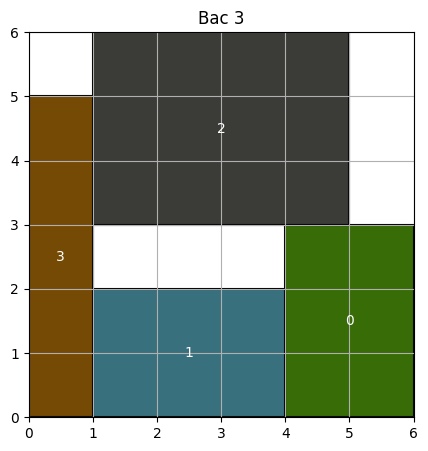

In [1082]:
import matplotlib.pyplot as plt
import random

def plot_bins(solution, items, X, Y, x, bin_width, bin_height, num_bins):
    for b in range(num_bins):
        if solution.get_value(f"y_{b}") > 0.5:
            fig, ax = plt.subplots()
            ax.set_title(f"Bac {b}")
            ax.set_xlim(0, bin_width)
            ax.set_ylim(0, bin_height)
            ax.set_aspect('equal')
            ax.grid(True)

            for i, (w, h) in items.items():
                if solution.get_value(x[i, b]) > 0.5:
                    xi = solution.get_value(X[i, b])
                    yi = solution.get_value(Y[i, b])

                    color = (random.random(), random.random(), random.random())
                    rect = plt.Rectangle((xi, yi), w, h,
                                          facecolor=color,
                                          edgecolor='black',
                                          linewidth=1.5)
                    ax.add_patch(rect)

                    ax.text(xi + w/2, yi + h/2, f"{i}",
                            ha='center', va='center',
                            fontsize=10, color='white')

            plt.show()

plot_bins(solution, items, X, Y, x, bin_width, bin_height, num_bins)

# <b> 34.  Modeling of a 3d bin packing problem  </b>

<div style="text-align:center">
<img src="img/3dpack.jpg" width="500">
</div>


## <b>Abstract</b>
The goal is to fit as many cubes, having different heights, lengths and widths, into a bin.
There can be several bins.
The objective is to allocate all the items to the minimum number of bins.

The objective is to place objects of dimensions (l, w, h) in containers (L, W, H) while minimizing the number of containers used, respecting the constraints of non-overlap and placement.

Let's first test this chatGpt code.

## <b>Instance</b>
 <table style="margin: 0px auto;">
  <tr>
    <td>Item</td>
    <td>A</td>
    <td>B</td>
    <td>C</td>

  </tr>
  <tr>
    <td>Length</td>
    <td>4</td>
    <td>4</td>
    <td>4</td>
 

  </tr>
  <tr>
    <td>Width</td>
    <td>3</td>
    <td>5</td>
    <td>2</td>


  </tr>
    <tr>
    <td>Height</td>
    <td>2</td>
    <td>3</td>
    <td>6</td>


  </tr>
</table> 
<br>
 <table style="margin: 0px auto;">
  <tr>
    <td>Container</td>
    <td>1</td>


  </tr>
  <tr>
    <td>Length</td>
    <td>10</td>
  </tr>
  <tr>
    <td>Width</td>
    <td>10</td>
  </tr>
    <tr>
    <td>Height</td>
    <td>10</td>
  </tr>

</table> 

## <b>Math model</b>
Comin' soon

## <b>Python Pulp code solution</b>

<div style="text-align:center">
<img src="img/chatgpt.png" width="200"/>
</div>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [1083]:
# -----------------------------------
# Import lib
# ----------------------------------- 
import pulp

# -----------------------------------
# Instance
# ----------------------------------- 
# Définir les conteneurs et objets
containers = ['C1']  # On peut ajouter plus de conteneurs si nécessaire
container_dims = {'C1': (10, 10, 10)}  # L, W, H

items = ['I1', 'I2', 'I3']
item_dims = {
    'I1': (4, 4, 4),
    'I2': (3, 5, 2),
    'I3': (2, 3, 6)
}

# -----------------------------------
# Decision variables
# ----------------------------------- 
# Variables de position des items dans le conteneur
x = pulp.LpVariable.dicts("x", (items, containers), lowBound=0, cat='Continuous')
y = pulp.LpVariable.dicts("y", (items, containers), lowBound=0, cat='Continuous')
z = pulp.LpVariable.dicts("z", (items, containers), lowBound=0, cat='Continuous')

# Variable binaire : l'objet i est dans le conteneur c
y_bin = pulp.LpVariable.dicts("y_bin", (items, containers), cat='Binary')

# -----------------------------------
# Type of problem
# ----------------------------------- 
prob = pulp.LpProblem("3D_Bin_Packing", pulp.LpMinimize)

# Objectif : minimiser le nombre de conteneurs utilisés
prob += pulp.lpSum([y_bin[i][c] for i in items for c in containers])

# Contraintes : chaque item doit être placé dans exactement un conteneur
for i in items:
    prob += pulp.lpSum([y_bin[i][c] for c in containers]) == 1

# Contraintes : les items doivent rester dans les limites du conteneur
for i in items:
    for c in containers:
        L, W, H = container_dims[c]
        l, w, h = item_dims[i]
        prob += x[i][c] + l <= L + (1 - y_bin[i][c]) * 1000
        prob += y[i][c] + w <= W + (1 - y_bin[i][c]) * 1000
        prob += z[i][c] + h <= H + (1 - y_bin[i][c]) * 1000

# Contraintes de non-chevauchement entre items dans le même conteneur
M = 1000  # grand nombre pour "Big-M"
for i in items:
    for j in items:
        if i >= j:
            continue
        for c in containers:
            l_i, w_i, h_i = item_dims[i]
            l_j, w_j, h_j = item_dims[j]
            # au moins une des conditions doit être vraie pour éviter le chevauchement
            b1 = pulp.LpVariable(f"b1_{i}_{j}_{c}", cat='Binary')
            b2 = pulp.LpVariable(f"b2_{i}_{j}_{c}", cat='Binary')
            b3 = pulp.LpVariable(f"b3_{i}_{j}_{c}", cat='Binary')
            b4 = pulp.LpVariable(f"b4_{i}_{j}_{c}", cat='Binary')
            b5 = pulp.LpVariable(f"b5_{i}_{j}_{c}", cat='Binary')
            b6 = pulp.LpVariable(f"b6_{i}_{j}_{c}", cat='Binary')
            
            prob += x[i][c] + l_i <= x[j][c] + M*(1 - b1)
            prob += x[j][c] + l_j <= x[i][c] + M*(1 - b2)
            prob += y[i][c] + w_i <= y[j][c] + M*(1 - b3)
            prob += y[j][c] + w_j <= y[i][c] + M*(1 - b4)
            prob += z[i][c] + h_i <= z[j][c] + M*(1 - b5)
            prob += z[j][c] + h_j <= z[i][c] + M*(1 - b6)
            prob += b1 + b2 + b3 + b4 + b5 + b6 >= 1

# -----------------------------------
# Display solution
# ----------------------------------- 
# Résolution
prob.solve(pulp.PULP_CBC_CMD(msg=1))

# Affichage des résultats
for i in items:
    for c in containers:
        if y_bin[i][c].varValue > 0.5:
            print(f"{i} placed in {c} at coordinates ({x[i][c].varValue}, {y[i][c].varValue}, {z[i][c].varValue})")


I1 placed in C1 at coordinates (0.0, 0.0, 0.0)
I2 placed in C1 at coordinates (0.0, 0.0, 8.0)
I3 placed in C1 at coordinates (8.0, 0.0, 0.0)


ChatGpt explanations :

- y_bin[i][c]: 1 if object i is placed in container c.

- x[i][c], y[i][c], z[i][c]: coordinates of the lower left corner of the object in the container.

- Big-M constraints: to manage overlap.

- Objective: minimize the number of containers used.


## <b> Drawing items inside of the Bin</b>

I asked ChatGpt to directly draw items inside of the bins, Solution looks weird but not bad to me, items are correclty placed : 

<div style="text-align:center">
<img src="img/matplotlib-300x128.png">
</div>


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import random

# -----------------------------
# Fonction pour dessiner une boîte 3D
# -----------------------------
def draw_box(ax, x, y, z, dx, dy, dz, color, alpha=0.6):
    vertices = [
        [(x,y,z),(x+dx,y,z),(x+dx,y+dy,z),(x,y+dy,z)],
        [(x,y,z+dz),(x+dx,y,z+dz),(x+dx,y+dy,z+dz),(x,y+dy,z+dz)],
        [(x,y,z),(x+dx,y,z),(x+dx,y,z+dz),(x,y,z+dz)],
        [(x,y+dy,z),(x+dx,y+dy,z),(x+dx,y+dy,z+dz),(x,y+dy,z+dz)],
        [(x,y,z),(x,y+dy,z),(x,y+dy,z+dz),(x,y,z+dz)],
        [(x+dx,y,z),(x+dx,y+dy,z),(x+dx,y+dy,z+dz),(x+dx,y,z+dz)]
    ]
    ax.add_collection3d(
        Poly3DCollection(vertices, facecolors=color, edgecolors='k', alpha=alpha)
    )

# -----------------------------
# Création de la figure
# -----------------------------
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# -----------------------------
# Dessin du conteneur
# -----------------------------
c = containers[0]  # un seul conteneur
L, W, H = container_dims[c]

draw_box(ax, 0, 0, 0, L, W, H, color='lightgray', alpha=0.15)

# -----------------------------
# Dessin des objets placés
# -----------------------------
random.seed(1)
colors = {i: (random.random(), random.random(), random.random()) for i in items}

for i in items:
    if y_bin[i][c].varValue > 0.5:
        xi = x[i][c].varValue
        yi = y[i][c].varValue
        zi = z[i][c].varValue
        li, wi, hi = item_dims[i]

        draw_box(ax, xi, yi, zi, li, wi, hi, colors[i])
        ax.text(xi + li/2, yi + wi/2, zi + hi/2, i, color='black')

# -----------------------------
# Réglages des axes
# -----------------------------
ax.set_xlim(0, L)
ax.set_ylim(0, W)
ax.set_zlim(0, H)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_title("3D Bin Packing – Solution PuLP")

plt.tight_layout()
plt.show()


Now, I have asked chatGpt to model the same bin packing 3d instance, but using Cplex and his indicators, instead of BIGM constraints in PULP.

<div style="text-align:center">
<img src="img/IBM_CPLEX_0.png">
</div>

In [ ]:
from docplex.mp.model import Model

# -----------------------------
# Données
# -----------------------------
containers = ['C1']
container_dims = {'C1': (10, 10, 10)}

items = ['I1', 'I2', 'I3']
item_dims = {
    'I1': (4, 4, 4),
    'I2': (3, 5, 2),
    'I3': (2, 3, 6)
}

# -----------------------------
# Modèle
# -----------------------------
mdl = Model(name="3D_Bin_Packing_Indicators")

# Variables de position
x = mdl.continuous_var_dict(((i, c) for i in items for c in containers), lb=0, name="x")
y = mdl.continuous_var_dict(((i, c) for i in items for c in containers), lb=0, name="y")
z = mdl.continuous_var_dict(((i, c) for i in items for c in containers), lb=0, name="z")

# Affectation
assign = mdl.binary_var_dict(((i, c) for i in items for c in containers), name="assign")

# -----------------------------
# Objectif
# -----------------------------
mdl.minimize(mdl.sum(assign[i, c] for i in items for c in containers))

# -----------------------------
# Chaque objet dans le conteneur
# -----------------------------
for i in items:
    mdl.add_constraint(mdl.sum(assign[i, c] for c in containers) == 1)

# -----------------------------
# Contraintes de limites du conteneur (indicateurs)
# -----------------------------
for i in items:
    li, wi, hi = item_dims[i]
    for c in containers:
        L, W, H = container_dims[c]
        mdl.add_indicator(assign[i, c], x[i, c] + li <= L)
        mdl.add_indicator(assign[i, c], y[i, c] + wi <= W)
        mdl.add_indicator(assign[i, c], z[i, c] + hi <= H)

# -----------------------------
# Contraintes de non-chevauchement (indicateurs)
# -----------------------------
for idx_i in range(len(items)):
    for idx_j in range(idx_i + 1, len(items)):
        i = items[idx_i]
        j = items[idx_j]

        li, wi, hi = item_dims[i]
        lj, wj, hj = item_dims[j]

        for c in containers:
            sep = mdl.binary_var_list(6, name=f"sep_{i}_{j}_{c}")

            # x
            mdl.add_indicator(sep[0], x[i, c] + li <= x[j, c])
            mdl.add_indicator(sep[1], x[j, c] + lj <= x[i, c])

            # y
            mdl.add_indicator(sep[2], y[i, c] + wi <= y[j, c])
            mdl.add_indicator(sep[3], y[j, c] + wj <= y[i, c])

            # z
            mdl.add_indicator(sep[4], z[i, c] + hi <= z[j, c])
            mdl.add_indicator(sep[5], z[j, c] + hj <= z[i, c])

            # au moins une séparation active
            mdl.add_constraint(mdl.sum(sep) >= 1)

# -----------------------------
# Résolution
# -----------------------------
solution = mdl.solve(log_output=True)

# -----------------------------
# Résultats
# -----------------------------
if solution:
    print("\nSolution trouvée :\n")
    for i in items:
        for c in containers:
            if assign[i, c].solution_value > 0.5:
                print(
                    f"{i} dans {c} à "
                    f"({x[i,c].solution_value:.2f}, "
                    f"{y[i,c].solution_value:.2f}, "
                    f"{z[i,c].solution_value:.2f})"
                )
else:
    print("Aucune solution trouvée.")


Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 12 rows and 3 columns.
MIP Presolve modified 9 coefficients.
Aggregator did 9 substitutions.
Reduced MIP has 30 rows, 36 columns, and 81 nonzeros.
Reduced MIP has 18 binaries, 0 generals, 0 SOSs, and 18 indicators.
Presolve time = 0.05 sec. (0.07 ticks)
Found incumbent of value 3.000000 after 0.06 sec. (0.12 ticks)

Root node processing (before b&c):
  Real time             =    0.06 sec. (0.12 ticks)
Parallel b&c, 8 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.06 sec. (0.12 ticks)

Solution trouvée :

I1 dans C1 à (0.00, 3.00, 0.00)
I2 dans C1 à (2.00, 0.00, 4.00)
I3 dans C1 à (0.00, 0.00, 0.00)


And now, I have asked chatGpt to draw items inside of the bin, solution seems to be better than the Pulp One.


<div style="text-align:center">
<img src="img/matplotlib-300x128.png">
</div>

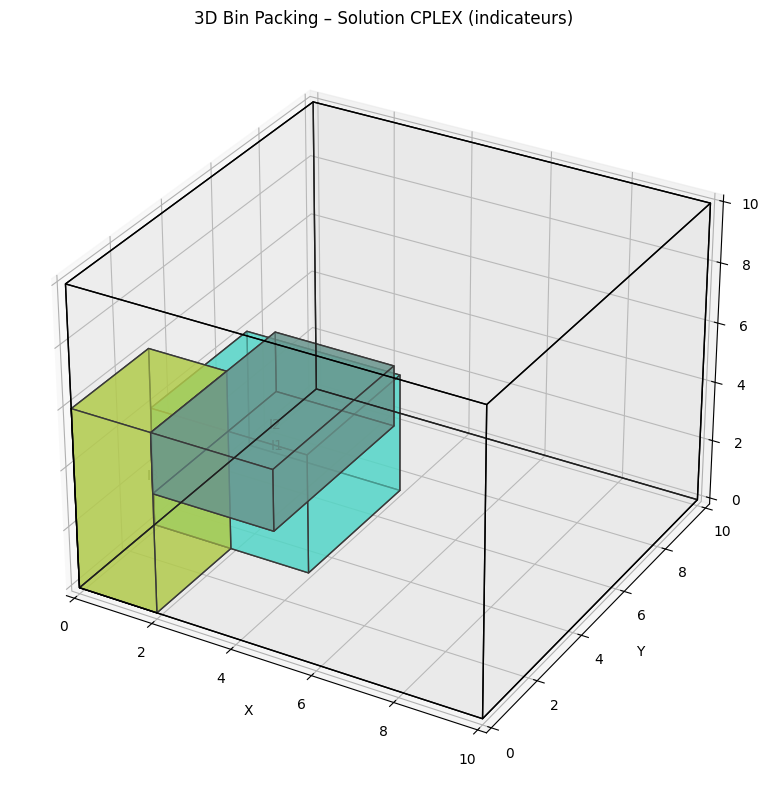

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import random

# -----------------------------
# Fonction pour dessiner une boîte 3D
# -----------------------------
def draw_box(ax, x, y, z, dx, dy, dz, color, alpha=0.6):
    vertices = [
        [(x,y,z),(x+dx,y,z),(x+dx,y+dy,z),(x,y+dy,z)],
        [(x,y,z+dz),(x+dx,y,z+dz),(x+dx,y+dy,z+dz),(x,y+dy,z+dz)],
        [(x,y,z),(x+dx,y,z),(x+dx,y,z+dz),(x,y,z+dz)],
        [(x,y+dy,z),(x+dx,y+dy,z),(x+dx,y+dy,z+dz),(x,y+dy,z+dz)],
        [(x,y,z),(x,y+dy,z),(x,y+dy,z+dz),(x,y,z+dz)],
        [(x+dx,y,z),(x+dx,y+dy,z),(x+dx,y+dy,z+dz),(x+dx,y,z+dz)]
    ]
    ax.add_collection3d(
        Poly3DCollection(vertices, facecolors=color, edgecolors='k', alpha=alpha)
    )

# -----------------------------
# Création de la figure
# -----------------------------
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# -----------------------------
# Dessin du conteneur
# -----------------------------
c = containers[0]  # un seul conteneur
L, W, H = container_dims[c]

draw_box(ax, 0, 0, 0, L, W, H, color='lightgray', alpha=0.15)

# -----------------------------
# Dessin des objets placés
# -----------------------------
random.seed(1)
colors = {i: (random.random(), random.random(), random.random()) for i in items}

for i in items:
    if assign[i, c].solution_value > 0.5:
        xi = x[i, c].solution_value
        yi = y[i, c].solution_value
        zi = z[i, c].solution_value
        li, wi, hi = item_dims[i]

        draw_box(ax, xi, yi, zi, li, wi, hi, colors[i])
        ax.text(
            xi + li/2,
            yi + wi/2,
            zi + hi/2,
            i,
            color='black',
            fontsize=10,
            ha='center'
        )

# -----------------------------
# Réglages des axes
# -----------------------------
ax.set_xlim(0, L)
ax.set_ylim(0, W)
ax.set_zlim(0, H)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_title("3D Bin Packing – Solution CPLEX (indicateurs)")

plt.tight_layout()
plt.show()


# <b> 34.Modeling of a 2d cutting stock problem  </b>

<div style="text-align:center">
<img src="img/1714987858283.png" width="500">
</div>

## <b>Abstract</b>
The goal is to cut fabric or metal in the most judicious way, so as not to waste inventory, and save money.

## <b>Difference between 1d cutting stock and 2d cutting stock.</b>

When you create a one-dimensional pattern, you only cut the pieces widthwise.
Whereas when we create a two-dimensional pattern, we cut the pieces along the width and height.

## <b>Instance</b>
Comin' soon

## <b>Math model</b>
Comin' soon

## <b>Cplex code solution</b>
Comin' soon

# <b>36.Modeling of a flow shop problem  </b> 

<div style="text-align:center">
<img src="img/flow.jpg" width="500">
</div>


## <b>Abstract</b>
The goal is to reduce the completion time of n jobs with varying processing time, on m different machines.
The optimization gives the best sequences of jobs to minimize the completion time.
All jobs pass through all machines in the same order.Each job comprises a set of m
operations which must be done on different machines. 

<div style="text-align:center">
<img src="img/ordonnancement/Flow_Shop_Ordonnancement.JPEG">
</div>

## <b>Difference with the flow shop and the permutation flow shop</b>

<div style="text-align:center">
<img src="img/chatgpt.png" width="200"/>
</div>
<div style="text-align:center">
<img src="img/Screenshot 2026-02-05 at 20-30-27 Flow Shop vs Permutation Flow Shop.png">
</div>
<div style="text-align:center">
<img src="img/Screenshot 2026-02-05 at 20-33-04 Flow Shop vs Permutation Flow Shop.png">
</div>


## <b>Instance</b>

Here is the instance given by the cplex github website .
<table border="1">
<tr><td>Number of jobs </td><td>20</td></tr>
<tr><td>Number of machines </td><td>5</td></tr>
</table>

<br>

<table border="1">
<tr><td>Job number</td><td>Duration machine 1</td><td>Duration machine 2</td><td>Duration machine 3</td><td>Duration machine 4</td><td>Duration machine 5</td></tr>
 
  <tr><td>1</td><td>62</td><td>22</td><td>77</td><td>88</td><td>39</td></tr>
  <tr><td>2</td><td>68</td><td>94</td><td>66</td><td>57</td><td>48</td></tr>
  <tr><td>3</td><td>57</td><td>6</td><td>20</td><td>24</td><td>86</td></tr>
  <tr><td>4</td><td>54</td><td>37</td><td>87</td><td>50</td><td>78</td></tr>
  <tr><td>5</td><td>50</td><td>80</td><td>62</td><td>60</td><td>58</td></tr>
  <tr><td>6</td><td>59</td><td>78</td><td>79</td><td>93</td><td>88</td></tr>
  <tr><td>7</td><td>36</td><td>55</td><td>10</td><td>13</td><td>43</td></tr>
  <tr><td>8</td><td>46</td><td>81</td><td>36</td><td>13</td><td>36</td></tr>
  <tr><td>9</td><td>83</td><td>67</td><td>39</td><td>1</td><td>88</td></tr>
  <tr><td>10</td><td>23</td><td>54</td><td>25</td><td>8</td><td>2</td></tr>
  <tr><td>11</td><td>2</td><td>57</td><td>82</td><td>63</td><td>16</td></tr>
  <tr><td>12</td><td>38</td><td>20</td><td>93</td><td>15</td><td>13</td></tr>
  <tr><td>13</td><td>82</td><td>51</td><td>66</td><td>89</td><td>63</td></tr>
  <tr><td>14</td><td>9</td><td>34</td><td>42</td><td>42</td><td>46</td></tr>
  <tr><td>15</td><td>76</td><td>25</td><td>13</td><td>13</td><td>23</td></tr>
  <tr><td>16</td><td>99</td><td>34</td><td>77</td><td>24</td><td>41</td></tr>
  <tr><td>17</td><td>76</td><td>23</td><td>96</td><td>56</td><td>84</td></tr>
  <tr><td>18</td><td>12</td><td>94</td><td>2</td><td>5</td><td>9</td></tr>
  <tr><td>19</td><td>13</td><td>84</td><td>57</td><td>78</td><td>72</td></tr>
  <tr><td>20</td><td>19</td><td>86</td><td>6</td><td>58</td><td>27</td></tr>
</table>

## <b>Math model</b>
Comin' soon

https://publications.waset.org/14079/mathematical-models-of-flow-shop-and-job-shop-scheduling-problems

## <b>Cplex code solution</b>
Source : https://github.com/IBMDecisionOptimization/docplex-examples/blob/master/examples/cp/visu/flow_shop_permutation.py

Solving model...
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 105 variables, 89 constraints
 ! FailLimit            = 10000
 ! TimeLimit            = 10
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 664.4 (before), 664.4 (after)
 !  . Memory usage      : 649.9 kB (before), 649.9 kB (after)
 ! Using parallel search with 8 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        105                 -
 + New bound is 397
 *          1388      201  0.29s        1      (gap is 71.40%)
 *          1382      401  0.29s        1      (gap is 71.27%)
 *          1323      601  0.30s        1      (gap is 69.99%)
 *          1322      995  0.30s        1      (gap is 69.97%)
            1322     1000          1    1       141  = startOf(J12-M1)
 *          13

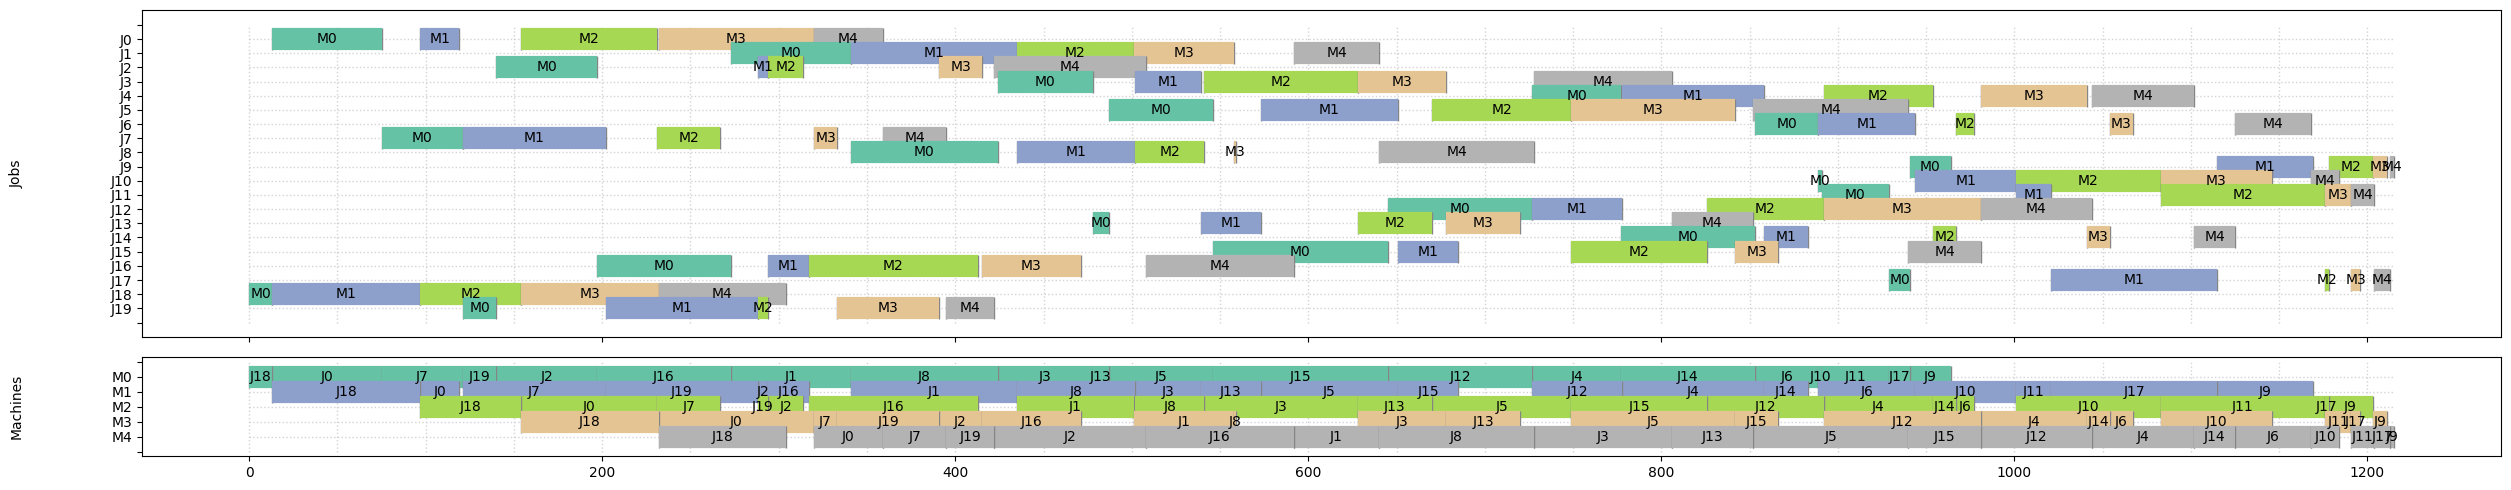

In [ ]:
# --------------------------------------------------------------------------
# Source file provided under Apache License, Version 2.0, January 2004,
# http://www.apache.org/licenses/
# (c) Copyright IBM Corp. 2015, 2022
# --------------------------------------------------------------------------

"""
The general Flow-Shop scheduling problem is a production problem where
a set of n jobs have to be processed with identical flow pattern on m
machines (see flow_shop.py).

In permutation flow-shops the sequence of jobs is the same on all machines.
For example, if machine 1 runs jobs J2, J1, J5, then the order is the same
on all other machines.

Please refer to documentation for appropriate setup of solving configuration.
"""

from docplex.cp.model import *
import os


#-----------------------------------------------------------------------------
# Initialize the problem data
#-----------------------------------------------------------------------------

# Read the input data file.
# Available files are flowshop_default, and different flowshop_tailXXXX.
# First line contains the number of jobs, and the number of machines.
# The rest of the file consists of one line per job that contains the list of
# operations given as durations for each machines.
# filename = os.path.dirname(os.path.abspath(__file__)) + '/docs/flowshop_default.data'
filename = 'docs/flowshop_default.data'
with open(filename, 'r') as file:
    NB_JOBS, NB_MACHINES = [int(v) for v in file.readline().split()]
    OP_DURATIONS = [[int(v) for v in file.readline().split()] for i in range(NB_JOBS)]


#-----------------------------------------------------------------------------
# Build the model
#-----------------------------------------------------------------------------

# Create model
mdl = CpoModel()

# Create one interval variable per job operation
operations = [[interval_var(size=OP_DURATIONS[j][m], name='J{}-M{}'.format(j, m)) for m in range(NB_MACHINES)] for j in range(NB_JOBS)]

# Create sequence of operation for each machine
op_sequences = [sequence_var([operations[i][j] for i in range(NB_JOBS)], name='M{}'.format(j)) for j in range(NB_MACHINES)]

# Force each operation to start after the end of the previous
for j in range(NB_JOBS):
    for m in range(1, NB_MACHINES):
        mdl.add(end_before_start(operations[j][m-1], operations[j][m]))

# Force no overlap for operations executed on a same machine
for m in range(NB_MACHINES):
    mdl.add(no_overlap(op_sequences[m]))

# Force sequences to be all identical on all machines
for m in range(1, NB_MACHINES):
    mdl.add(same_sequence(op_sequences[0], op_sequences[m]))

# Minimize termination date
mdl.add(minimize(max([end_of(operations[i][NB_MACHINES-1]) for i in range(NB_JOBS)])))


#-----------------------------------------------------------------------------
# Solve the model and display the result
#-----------------------------------------------------------------------------

# Solve model
print('Solving model...')
res = mdl.solve(FailLimit=10000, TimeLimit=10)

# Draw solution
import docplex.cp.utils_visu as visu
if res and visu.is_visu_enabled():
    visu.timeline('Solution for permutation flow-shop ' + filename)
    visu.panel('Jobs')
    for i in range(NB_JOBS):
        visu.sequence(name='J' + str(i),
                      intervals=[(res.get_var_solution(operations[i][j]), j, 'M' + str(j)) for j in range(NB_MACHINES)])
    visu.panel('Machines')
    for j in range(NB_MACHINES):
        visu.sequence(name='M' + str(j),
                      intervals=[(res.get_var_solution(operations[i][j]), j, 'J' + str(i)) for i in range(NB_JOBS)])
    visu.show()

## <b> Github Erai Cakici code </b>

https://github.com/ErayCakici/Machine-Scheduling-DOCPLEX-Examples_CP/blob/main/ParallelMch_FlowShop.ipynb


Please wait ,I'm not going to simply recopy his code, I will make it match the math model, create another instance with no random datas,  and compare the solution to the others codes.

In [ ]:


nbrOfJobs = 10
jobs_list = [*range(0,nbrOfJobs)] 
nbrOfMachines = 3
machines_list = [*range(0, nbrOfMachines)] 
#randomly generate processing time of jobs' operations on each machine
import random
minProcessingTime=10
maxProcessingTime=40
processingTimes_list = [[random.randint(minProcessingTime,maxProcessingTime) for m in machines_list]  for j in jobs_list] 
from docplex.cp.model import *
mdl = CpoModel(name='parallelMachineScheduling_Flow_Shop') 
# Create one interval variable per job operation
job_operations_itv_vars = [[mdl.interval_var(size=processingTimes_list[j][m], name="J{}-M{}".format(j, m)) for m in range(nbrOfMachines)] for j in range(nbrOfJobs)]


#minimize makespan
objective = mdl.max([mdl.end_of(job_operations_itv_vars[i][nbrOfMachines - 1]) for i in range(nbrOfJobs)])
mdl.add(mdl.minimize(objective)) 

# Force each operation to start after the end of the previous
for j in range(nbrOfJobs):
    for m in range(1, nbrOfMachines):
        mdl.add(mdl.end_before_start(job_operations_itv_vars[j][m - 1], job_operations_itv_vars [j][m]))



# Force no overlap for operations executed on the same machine
for m in range(nbrOfMachines):
    mdl.add(mdl.no_overlap([job_operations_itv_vars[j][m] for j in range(nbrOfJobs)]))


msol= mdl.solve(log_output=True)



print("Solution: ")
msol.print_solution()



 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 33 variables, 23 constraints
 ! Initial process time : 0.02s (0.02s extraction + 0.01s propagation)
 !  . Log search space  : 147.2 (before), 147.2 (after)
 !  . Memory usage      : 476.8 kB (before), 476.8 kB (after)
 ! Using parallel search with 8 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         33                 -
 + New bound is 91
 ! Using iterative diving.
 *           337       61  0.04s        1      (gap is 73.00%)
 *           336      143  0.04s        1      (gap is 72.92%)
 *           328      235  0.04s        1      (gap is 72.26%)
 *           321      323  0.04s        1      (gap is 71.65%)
 *           318      383  0.04s        1      (gap is 71.38%)
 *           308      420  0.04s        1      (gap is 70.45%)
 *          

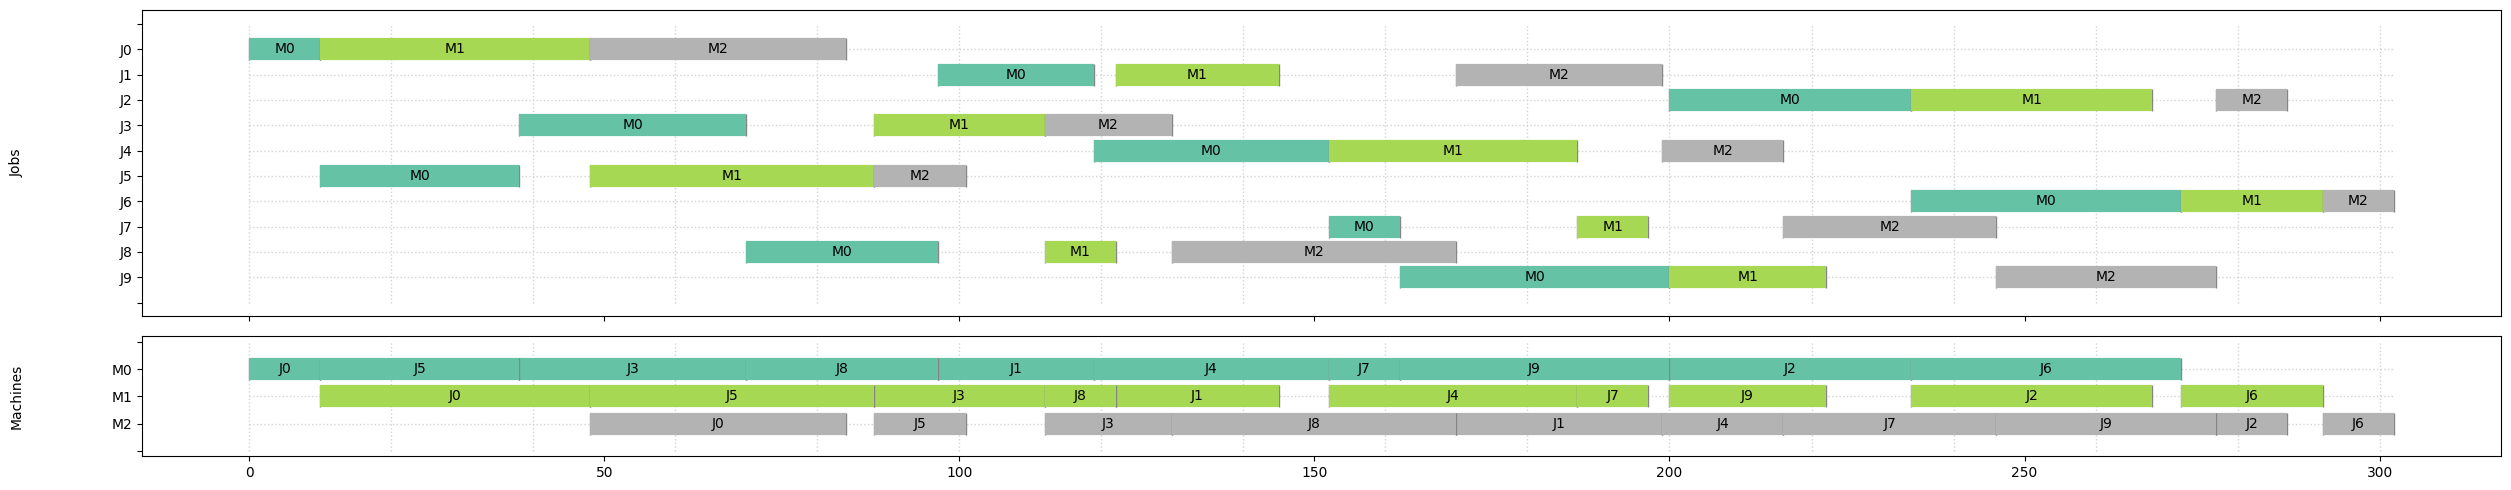

In [ ]:


#-----------------------------------------------------------------------------
# Solve the model and display the result
#-----------------------------------------------------------------------------

# Display solution
import docplex.cp.utils_visu as visu
import matplotlib.pyplot as plt
#Change the plot size
from pylab import rcParams
rcParams['figure.figsize'] = 25, 5

if msol and visu.is_visu_enabled():
    visu.timeline("Solution for flow-shop ")
    visu.panel("Jobs")
    for i in range(nbrOfJobs):
        visu.sequence(name='J' + str(i),
                      intervals=[(msol.get_var_solution(job_operations_itv_vars[i][j]), j, 'M' + str(j)) for j in range(nbrOfMachines)])
    visu.panel("Machines")
    for j in range(nbrOfMachines):
        visu.sequence(name='M' + str(j),
                      intervals=[(msol.get_var_solution(job_operations_itv_vars[i][j]), j, 'J' + str(i)) for i in range(nbrOfJobs)])
    visu.show()



# <b>36.2 Modeling of a simple flow shop problem - ChatGpt </b> 

<div style="text-align:center">
<img src="img/flow.jpg" width="500">
</div>
<div style="text-align:center">
<img src="img/chatgpt.png" width="200"/>
</div>

<i>Can you create a permutation flow shop with pulp, minimal real life example with only 5 jobs and 3 machines?</i>

Absolutely—let’s do a clean, realistic permutation flow shop example using PuLP, with 5 jobs and 3 machines, and a real-life interpretation.

## <b>Instance </b>

Real-life scenario (simple & concrete)

Small furniture workshop 🪑
You produce 5 custom tables. Every table must go through the same 3 machines in the same order:

- Cutting (Machine 1)

- Sanding (Machine 2)

- Finishing (Machine 3)

Because of space and setup constraints, all tables must follow the same job order on every machine → that’s exactly a Permutation Flow Shop Scheduling Problem (PFSP).

Goal: minimize the makespan (total completion time).

| Job | Cutting | Sanding | Finishing |
| --- | ------- | ------- | --------- |
| J1  | 3       | 2       | 2         |
| J2  | 2       | 1       | 4         |
| J3  | 4       | 3       | 3         |
| J4  | 2       | 3       | 1         |
| J5  | 3       | 2       | 3         |

## <b>Math model  </b>
Modeling approach (important idea)

To enforce a permutation flow shop, we:

- Decide a single sequence of jobs

- Apply that same order to all machines

- Use binary precedence variables x[i,j] = 1 if job i is before job j

- This is a classic MILP formulation.


## <b>Python pulp solution </b>

In [ ]:
import pulp

# ----------------------------
# Data
# ----------------------------
jobs = ['J1', 'J2', 'J3', 'J4', 'J5']
machines = ['M1', 'M2', 'M3']

processing_time = {
    ('J1','M1'):3, ('J1','M2'):2, ('J1','M3'):2,
    ('J2','M1'):2, ('J2','M2'):1, ('J2','M3'):4,
    ('J3','M1'):4, ('J3','M2'):3, ('J3','M3'):3,
    ('J4','M1'):2, ('J4','M2'):3, ('J4','M3'):1,
    ('J5','M1'):3, ('J5','M2'):2, ('J5','M3'):3
}

BIG_M = 1000

# ----------------------------
# Model
# ----------------------------
model = pulp.LpProblem("Permutation_Flow_Shop", pulp.LpMinimize)

# Start times
S = pulp.LpVariable.dicts("Start",
                          [(j,m) for j in jobs for m in machines],
                          lowBound=0)

# Precedence variables
x = pulp.LpVariable.dicts("Order",
                          [(i,j) for i in jobs for j in jobs if i != j],
                          cat="Binary")

# Makespan
Cmax = pulp.LpVariable("Cmax", lowBound=0)

# ----------------------------
# Objective
# ----------------------------
model += Cmax

# ----------------------------
# Constraints
# ----------------------------

# Machine order (flow shop constraint)
for j in jobs:
    for k in range(len(machines)-1):
        model += (
            S[(j, machines[k+1])] >=
            S[(j, machines[k])] + processing_time[(j, machines[k])]
        )

# Permutation constraints (same order on all machines)
for i in jobs:
    for j in jobs:
        if i != j:
            for m in machines:
                model += (
                    S[(j,m)] >=
                    S[(i,m)] + processing_time[(i,m)]
                    - BIG_M * (1 - x[(i,j)])
                )

# One job precedes the other
for i in jobs:
    for j in jobs:
        if i != j:
            model += x[(i,j)] + x[(j,i)] == 1

# Makespan definition
for j in jobs:
    model += (
        Cmax >=
        S[(j,'M3')] + processing_time[(j,'M3')]
    )

# ----------------------------
# Solve
# ----------------------------
model.solve(pulp.PULP_CBC_CMD(msg=False))

# ----------------------------
# Results
# ----------------------------
print("Optimal Makespan:", pulp.value(Cmax))
print("\nJob sequence:")

sequence = sorted(jobs,
                  key=lambda j: sum(pulp.value(x[(i,j)])
                                    for i in jobs if i != j))
print(sequence)


Optimal Makespan: 18.0

Job sequence:
['J5', 'J2', 'J3', 'J1', 'J4']


What this gives you

✅ True permutation flow shop (same order on all machines)

✅ MILP formulation

✅ Small, understandable

✅ Realistic shop-floor example

<i>Can you plot the solution using a gantt chart ?</i>

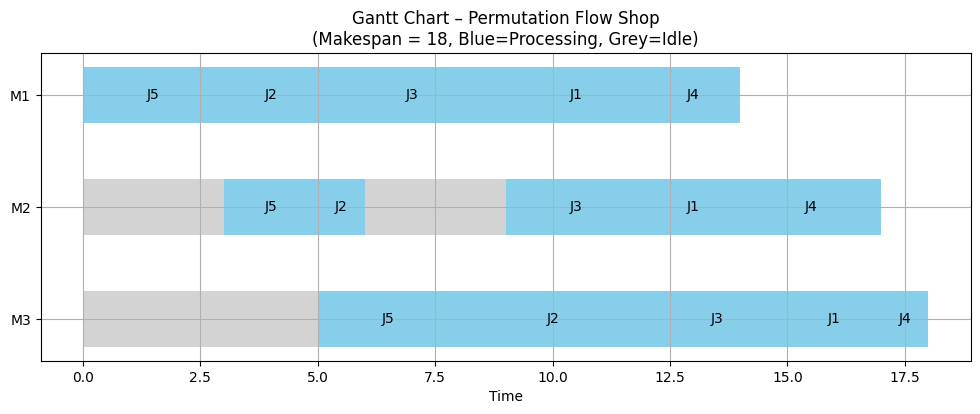

In [ ]:
import matplotlib.pyplot as plt

# ----------------------------
# Job sequence
# ----------------------------
sequence = ['J5', 'J2', 'J3', 'J1', 'J4']
machines = ['M1', 'M2', 'M3']

processing_time = {
    ('J1','M1'):3, ('J1','M2'):2, ('J1','M3'):2,
    ('J2','M1'):2, ('J2','M2'):1, ('J2','M3'):4,
    ('J3','M1'):4, ('J3','M2'):3, ('J3','M3'):3,
    ('J4','M1'):2, ('J4','M2'):3, ('J4','M3'):1,
    ('J5','M1'):3, ('J5','M2'):2, ('J5','M3'):3
}

# ----------------------------
# Compute start & finish times
# ----------------------------
start = {}
finish = {}

for m in machines:
    machine_time = 0
    for j in sequence:
        if m == 'M1':
            start[(j,m)] = machine_time
        else:
            prev_m = machines[machines.index(m)-1]
            start[(j,m)] = max(finish[(j,prev_m)], machine_time)
        finish[(j,m)] = start[(j,m)] + processing_time[(j,m)]
        machine_time = finish[(j,m)]

makespan = finish[(sequence[-1], 'M3')]

# ----------------------------
# Plot Gantt chart with idle times
# ----------------------------
fig, ax = plt.subplots(figsize=(12,4))
machine_y = {'M1':30, 'M2':20, 'M3':10}

for m in machines:
    prev_end = 0
    for j in sequence:
        # Idle time
        if start[(j,m)] > prev_end:
            ax.broken_barh(
                [(prev_end, start[(j,m)] - prev_end)],
                (machine_y[m], 5),
                facecolors='lightgrey'
            )
        # Job processing
        ax.broken_barh(
            [(start[(j,m)], processing_time[(j,m)])],
            (machine_y[m], 5),
            facecolors='skyblue'
        )
        ax.text(
            start[(j,m)] + processing_time[(j,m)]/2,
            machine_y[m] + 2.5,
            j,
            ha='center',
            va='center'
        )
        prev_end = finish[(j,m)]

ax.set_yticks([machine_y[m] + 2.5 for m in machines])
ax.set_yticklabels(machines)
ax.set_xlabel("Time")
ax.set_title(f"Gantt Chart – Permutation Flow Shop\n(Makespan = {makespan}, Blue=Processing, Grey=Idle)")
plt.grid(True)
plt.show()

✅ Key Features of this chart

Blue bars = job is processing

Grey bars = machine idle / waiting for previous machine

Y-axis = machines

X-axis = time

Makespan is displayed in the title

This visualization makes it immediately obvious where bottlenecks or idle times occur, which is super useful for scheduling optimization.

If you want, I can also compute total idle time per machine and highlight the critical path for this schedule — that’s often used in shop-floor optimization to see which machine limits throughput.

Do you want me to do that next?

<i> Please solve the same problem, but using cplex, and indicators, instead of bigm constraints</i>

Great ask — this is the clean, modern CPLEX way to do it 👌
We’ll replace Big-M with indicator constraints, which are:

tighter

numerically safer

exactly what CPLEX is good at

Same problem, same data, pure permutation flow shop, just modeled better.



<div style="text-align:center">
<img src="img/Screenshot 2026-02-05 at 21-06-38 CPLEX DOcplex Solution.png" width="">
</div>

## <b> Cplex solution </b>

I notice that the makespan is now 18 instead of 17.5

In [ ]:
from docplex.mp.model import Model

# ----------------------------
# Data
# ----------------------------
jobs = ['J1', 'J2', 'J3', 'J4', 'J5']
machines = ['M1', 'M2', 'M3']

p = {
    ('J1','M1'):3, ('J1','M2'):2, ('J1','M3'):2,
    ('J2','M1'):2, ('J2','M2'):1, ('J2','M3'):4,
    ('J3','M1'):4, ('J3','M2'):3, ('J3','M3'):3,
    ('J4','M1'):2, ('J4','M2'):3, ('J4','M3'):1,
    ('J5','M1'):3, ('J5','M2'):2, ('J5','M3'):3
}



# ----------------------------
# Model
# ----------------------------
mdl = Model(name="Permutation_Flow_Shop_Indicators")

# Start times
S = mdl.continuous_var_dict(
    [(j,m) for j in jobs for m in machines],
    lb=0,
    name="S"
)

# Precedence variables
x = mdl.binary_var_dict(
    [(i,j) for i in jobs for j in jobs if i != j],
    name="x"
)

# Makespan
Cmax = mdl.continuous_var(lb=0, name="Cmax")

# ----------------------------
# Objective
# ----------------------------
mdl.minimize(Cmax)

# ----------------------------
# Constraints
# ----------------------------

# Flow shop constraints (machine order)
for j in jobs:
    for k in range(len(machines) - 1):
        mdl.add_constraint(
            S[(j, machines[k+1])] >=
            S[(j, machines[k])] + p[(j, machines[k])]
        )

# Indicator constraints for permutation
for i in jobs:
    for j in jobs:
        if i != j:
            for m in machines:
                mdl.add_indicator(
                    x[(i,j)],
                    S[(j,m)] >= S[(i,m)] + p[(i,m)]
                )

# One job precedes the other
for i in jobs:
    for j in jobs:
        if i != j:
            mdl.add_constraint(x[(i,j)] + x[(j,i)] == 1)

# Makespan definition
for j in jobs:
    mdl.add_constraint(
        Cmax >= S[(j,'M3')] + p[(j,'M3')]
    )

# ----------------------------
# Solve
# ----------------------------
solution = mdl.solve(log_output=True)

# ----------------------------
# Results
# ----------------------------
if solution:
    print("Optimal makespan:", Cmax.solution_value)

    sequence = sorted(
        jobs,
        key=lambda j: sum(x[(i,j)].solution_value for i in jobs if i != j)
    )
    print("Optimal job sequence:", sequence)

else:
    print("No solution found")


Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 0 columns.
MIP Presolve modified 30 coefficients.
Aggregator did 40 substitutions.
Reduced MIP has 45 rows, 56 columns, and 120 nonzeros.
Reduced MIP has 10 binaries, 0 generals, 0 SOSs, and 60 indicators.
Presolve time = 0.00 sec. (0.14 ticks)
Found incumbent of value 21.000000 after 0.00 sec. (0.34 ticks)
Probing time = 0.00 sec. (0.01 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 45 rows, 56 columns, and 120 nonzeros.
Reduced MIP has 10 binaries, 0 generals, 0 SOSs, and 60 indicators.
Presolve time = 0.00 sec. (0.07 ticks)
Probing time = 0.00 sec. (0.01 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.04 ticks)

        Nodes                              

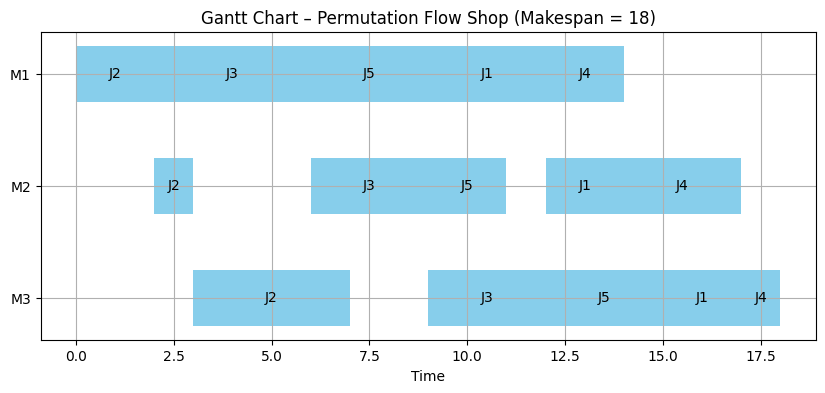

In [ ]:
import matplotlib.pyplot as plt

# ----------------------------
# Job sequence
# ----------------------------
sequence = ['J2', 'J3', 'J5', 'J1', 'J4']
machines = ['M1', 'M2', 'M3']

processing_time = {
    ('J1','M1'):3, ('J1','M2'):2, ('J1','M3'):2,
    ('J2','M1'):2, ('J2','M2'):1, ('J2','M3'):4,
    ('J3','M1'):4, ('J3','M2'):3, ('J3','M3'):3,
    ('J4','M1'):2, ('J4','M2'):3, ('J4','M3'):1,
    ('J5','M1'):3, ('J5','M2'):2, ('J5','M3'):3
}

# ----------------------------
# Compute start & finish times
# ----------------------------
start = {}
finish = {}

for m in machines:
    machine_time = 0
    for j in sequence:
        if m == 'M1':
            start[(j,m)] = machine_time
        else:
            prev_m = machines[machines.index(m)-1]
            start[(j,m)] = max(finish[(j,prev_m)], machine_time)
        finish[(j,m)] = start[(j,m)] + processing_time[(j,m)]
        machine_time = finish[(j,m)]

makespan = finish[(sequence[-1], 'M3')]

# ----------------------------
# Plot Gantt chart
# ----------------------------
fig, ax = plt.subplots(figsize=(10,4))

machine_y = {'M1':30, 'M2':20, 'M3':10}

for j in sequence:
    for m in machines:
        ax.broken_barh(
            [(start[(j,m)], processing_time[(j,m)])],
            (machine_y[m], 5),
            facecolors='skyblue'
        )
        ax.text(
            start[(j,m)] + processing_time[(j,m)]/2,
            machine_y[m] + 2.5,
            j,
            ha='center',
            va='center'
        )

ax.set_yticks([machine_y[m] + 2.5 for m in machines])
ax.set_yticklabels(machines)
ax.set_xlabel("Time")
ax.set_title(f"Gantt Chart – Permutation Flow Shop (Makespan = {makespan})")
plt.grid(True)
plt.show()

# <b>37.Modeling of a job shop problem  </b> 




<div style="text-align:center">
<img src="img/jobshop.jpg" width="500">
</div>

## <b>Abstract</b>
The goal is to reduce the execution time of n jobs with varying processing time, on m different machines.
There is a <b> machinery order to apply </b>, to each of the jobs.

<div style="text-align:center">
<img src="img/ordonnancement/Job_Shop_Ordonnancement.JPEG">
</div>

## <b> Difference between Flow shop and Job shop</b>
In the flow shop scheduling, all jobs pass through all machines <b>in the same order</b>. It is simplier.
<div style="text-align:center">
<img src="img/ordonnancement/Flow_Shop_Ordonnancement.JPEG">
</div>


## <b>Instance</b>
Comin' soon

## <b>Math model</b>
Comin' soon

https://publications.waset.org/14079/mathematical-models-of-flow-shop-and-job-shop-scheduling-problems

## <b>Cplex code solution</b>
Comin' soon


CPlex Min Kyung Lee code:
https://medium.com/@minkyunglee_5476/mixed-integer-linear-programming-for-flow-shop-and-job-shop-part-1-1b2a277ab5ae

In [ ]:
from docplex.mp.model import Model
import time

# Create model
model = Model(name="flowshop_ordering")

# Sets
jobs = ['i1', 'i2', 'i3', 'i4', 'i5', 'i6']
machines = ['bending', 'soldering', 'assembly']

# Processing times
proctime = {
    ('bending', 'i1'): 3, ('bending', 'i2'): 6, ('bending', 'i3'): 3,
    ('bending', 'i4'): 5, ('bending', 'i5'): 5, ('bending', 'i6'): 7,
    ('soldering', 'i1'): 5, ('soldering', 'i2'): 4, ('soldering', 'i3'): 2,
    ('soldering', 'i4'): 4, ('soldering', 'i5'): 4, ('soldering', 'i6'): 5,
    ('assembly', 'i1'): 5, ('assembly', 'i2'): 2, ('assembly', 'i3'): 4,
    ('assembly', 'i4'): 6, ('assembly', 'i5'): 3, ('assembly', 'i6'): 6,
}

bigM = 1000 #this is set to a large number for illustration purposes. Must choose a reasonable value

# Variables
y = {(j,k ): model.binary_var(name=f"y_{j}_{k}") for j in jobs for k in jobs} #j processed before k
t = {(i,m) : model.continuous_var(lb = 0, name = f"t_{i}_{m}") for i in jobs for m in machines} #start time of job j in machine m
makespan = model.continuous_var(lb=0, name="makespan")

# Objective
model.minimize(makespan)

# Constraint 1: job order
for j in jobs:
    for k in jobs:
        if j != k:
            for m in machines:
                model.add_constraint(t[j, m] + proctime[m, j] <= t[k, m] + bigM*(1 - y[j,k]))
                model.add_constraint(t[k, m] + proctime[m, k] <= t[j, m] + bigM*y[j,k])

# Constraint 2: machine order
for i in jobs:
    for m in range(len(machines) - 1):
        model.add_constraint(t[i, machines[m]] + proctime[machines[m], i] <= t[i, machines[m+1]])

# Constraint 3: makespan
for j in jobs:
    for m in machines:
        model.add_constraint(makespan >= t[j, m] + proctime[m, j])

# Solve
time_now = time.time()
solution = model.solve(log_output=True)
time_taken = time.time() - time_now

if solution:
    print("\nStart times:")
    for i in jobs:
        for m in machines:
            print(f"Start time of {i} on {m}: {t[i,m].solution_value:.2f} for {proctime[(m, i)]} hours")
    print("\nMakespan:", makespan.solution_value)

print(f"computational time is {time_taken} ")

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 6 columns.
Reduced MIP has 210 rows, 49 columns, and 600 nonzeros.
Reduced MIP has 30 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.24 ticks)
Probing time = 0.00 sec. (0.09 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 210 rows, 49 columns, and 600 nonzeros.
Reduced MIP has 30 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.29 ticks)
Probing time = 0.00 sec. (0.10 ticks)
Clique table members: 30.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.20 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0  

## <b> Google OR tools solution </b>

In [ ]:
"""Minimal jobshop example."""
import collections
from ortools.sat.python import cp_model


def main() -> None:
    """Minimal jobshop problem."""
    # Data.
    jobs_data = [  # task = (machine_id, processing_time).
        [(0, 3), (1, 2), (2, 2)],  # Job0
        [(0, 2), (2, 1), (1, 4)],  # Job1
        [(1, 4), (2, 3)],  # Job2
    ]

    machines_count = 1 + max(task[0] for job in jobs_data for task in job)
    all_machines = range(machines_count)
    # Computes horizon dynamically as the sum of all durations.
    horizon = sum(task[1] for job in jobs_data for task in job)

    # Create the model.
    model = cp_model.CpModel()

    # Named tuple to store information about created variables.
    task_type = collections.namedtuple("task_type", "start end interval")
    # Named tuple to manipulate solution information.
    assigned_task_type = collections.namedtuple(
        "assigned_task_type", "start job index duration"
    )

    # Creates job intervals and add to the corresponding machine lists.
    all_tasks = {}
    machine_to_intervals = collections.defaultdict(list)

    for job_id, job in enumerate(jobs_data):
        for task_id, task in enumerate(job):
            machine, duration = task
            suffix = f"_{job_id}_{task_id}"
            start_var = model.new_int_var(0, horizon, "start" + suffix)
            end_var = model.new_int_var(0, horizon, "end" + suffix)
            interval_var = model.new_interval_var(
                start_var, duration, end_var, "interval" + suffix
            )
            all_tasks[job_id, task_id] = task_type(
                start=start_var, end=end_var, interval=interval_var
            )
            machine_to_intervals[machine].append(interval_var)

    # Create and add disjunctive constraints.
    for machine in all_machines:
        model.add_no_overlap(machine_to_intervals[machine])

    # Precedences inside a job.
    for job_id, job in enumerate(jobs_data):
        for task_id in range(len(job) - 1):
            model.add(
                all_tasks[job_id, task_id + 1].start >= all_tasks[job_id, task_id].end
            )

    # Makespan objective.
    obj_var = model.new_int_var(0, horizon, "makespan")
    model.add_max_equality(
        obj_var,
        [all_tasks[job_id, len(job) - 1].end for job_id, job in enumerate(jobs_data)],
    )
    model.minimize(obj_var)

    # Creates the solver and solve.
    solver = cp_model.CpSolver()
    status = solver.solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print("Solution:")
        # Create one list of assigned tasks per machine.
        assigned_jobs = collections.defaultdict(list)
        for job_id, job in enumerate(jobs_data):
            for task_id, task in enumerate(job):
                machine = task[0]
                assigned_jobs[machine].append(
                    assigned_task_type(
                        start=solver.value(all_tasks[job_id, task_id].start),
                        job=job_id,
                        index=task_id,
                        duration=task[1],
                    )
                )

        # Create per machine output lines.
        output = ""
        for machine in all_machines:
            # Sort by starting time.
            assigned_jobs[machine].sort()
            sol_line_tasks = "Machine " + str(machine) + ": "
            sol_line = "           "

            for assigned_task in assigned_jobs[machine]:
                name = f"job_{assigned_task.job}_task_{assigned_task.index}"
                # add spaces to output to align columns.
                sol_line_tasks += f"{name:15}"

                start = assigned_task.start
                duration = assigned_task.duration
                sol_tmp = f"[{start},{start + duration}]"
                # add spaces to output to align columns.
                sol_line += f"{sol_tmp:15}"

            sol_line += "\n"
            sol_line_tasks += "\n"
            output += sol_line_tasks
            output += sol_line

        # Finally print the solution found.
        print(f"Optimal Schedule Length: {solver.objective_value}")
        print(output)
    else:
        print("No solution found.")

    # Statistics.
    print("\nStatistics")
    print(f"  - conflicts: {solver.num_conflicts}")
    print(f"  - branches : {solver.num_branches}")
    print(f"  - wall time: {solver.wall_time}s")


if __name__ == "__main__":
    main()

Solution:
Optimal Schedule Length: 11.0
Machine 0: job_0_task_0   job_1_task_0   
           [0,3]          [3,5]          
Machine 1: job_2_task_0   job_0_task_1   job_1_task_2   
           [0,4]          [4,6]          [6,10]         
Machine 2: job_1_task_1   job_2_task_1   job_0_task_2   
           [5,6]          [6,9]          [9,11]         


Statistics
  - conflicts: 0
  - branches : 0
  - wall time: 0.0071048000000000005s


# <b> 38. Getting familiar with sensitivity analysis</b>

Best link :
https://www.eit.lth.se/fileadmin/eit/courses/eitn95/2018/Labs_assignments/Sensitivity_Analysis_in_Excel.pdf

Sensitivity analysis allows you to know to what extent you can change the parameters of the solution provided. This allows decision-makers to assess if it is worth increasing the inventory, for example.

- Reduced costs:

Reduced costs tell us how much the coefficients of the objective function (unit profits) can be increased or decreased before the optimal solution changes. Example: "If we increase the unit profit of children's seats with 20 or more units, the optimal value will change"

- The Shadow Price:

The Shadow Price tells us how much the optimal solution can be increased or decreased if we modify the available resources in a single unit.
 Or 
The Shadow price measures the variation in the value of the objective function per unit of increase in the limit of constraint.

- Slacks:

The quantity of a resource that is not used. Let us know how many resources are "wasted" or "unused". When you have inventory constraints, these values ​​allow you to know the amount of unused inventory.

## <b>Displaying sensitivity analysis with Python Pulp</b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's display the slacks and shadow price in this agricultural example done by me :

Looking at the results, we see that an amount of 16 food units is wasted , while doing the optimization.

There is no shadow price .

In [ ]:
# Good link : https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p 
import pandas as pd

# -----------------------------------
# Type of problem
# -----------------------------------
problem = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# -----------------------------------
# Decisions variables
# -----------------------------------
pet1 = p.LpVariable("pet1", 0, None, p.LpInteger)   
pet2 = p.LpVariable("pet2", 0, None, p.LpInteger)   
pet3 = p.LpVariable("pet3", 0, None, p.LpInteger)  

# -----------------------------------
# Objective function
# -----------------------------------
problem +=  100 * pet1 + 110 * pet2 + 115 * pet3

# -----------------------------------
# Constraints
# -----------------------------------
# --  Les shadow price sont ici :
problem += (7 * pet1 + 7 * pet2 + 8 * pet3 <= 600,"water_constraint")
problem += (4.5* pet1 + 9 * pet2 + 3 * pet3 <= 700,"food_constraint")

# -----------------------------------
# Solve
# -----------------------------------
problem.solve()
# Display optimized vars
for v in problem.variables():
    print(v.name, "=", v.varValue)
# Display optimized objective function
print("Total maximized profit = ", p.value(problem.objective))
print(f"status: {problem.status}, {p.LpStatus[problem.status]}")

# -----------------------------------
# Sensitivity analysis
# -----------------------------------
sensitivity_data = []
for name, constraint in problem.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))


pet1 = 0.0
pet2 = 72.0
pet3 = 12.0
Total maximized profit =  9300.0
status: 1, Optimal
               Name                     Constraint  Shadow Price  Slack
0  water_constraint    {pet1: 7, pet2: 7, pet3: 8}          -0.0   -0.0
1   food_constraint  {pet1: 4.5, pet2: 9, pet3: 3}          -0.0   16.0


## <b> A second short example showing the Shadow Price in action. </b>

The Shadow Price tells us that if we increase the C1 constraint  which is our inventory, we will win 78.14 euros more , we also see that we waste 1.33 units of constraint 3 inventory. 



Author: Aaren Stubberfield

In [ ]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p

# -----------------------------------
# Type of problem
# -----------------------------------
model = p.LpProblem("Max_GlassCo_Profits",p.LpMaximize)
A = p.LpVariable('A', lowBound=0)
B = p.LpVariable('B', lowBound=0)
C = p.LpVariable('C', lowBound=0)

# -----------------------------------
# Objective
# -----------------------------------
model += 500 * A + 450 * B + 600 * C

# -----------------------------------
# Constraints
# -----------------------------------
# Constraint 1
model += 6 * A + 5 * B + 8 * C <= 60
# Constraint 2
model += 10.5 * A + 20 * B + 10 * C <= 150
# Constraint 3
model += A <= 8

# -----------------------------------
# Solve
# -----------------------------------
model.solve()
print("Model Status:{}".format(p.LpStatus[model.status]))
print("Objective = ", p.value(model.objective))
for v in model.variables():
    print(v.name, "=", v.varValue)
    
# -----------------------------------
# Sensitivity analysis
# -----------------------------------
sensitivity_data = []
for name, constraint in model.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))

Model Status:Optimal
Objective =  5133.333350000001
A = 6.6666667
B = 4.0
C = 0.0
  Name               Constraint  Shadow Price     Slack
0  _C1       {A: 6, B: 5, C: 8}     78.148148 -0.000000
1  _C2  {A: 10.5, B: 20, C: 10}      2.962963 -0.000000
2  _C3                   {A: 1}     -0.000000  1.333333
